# 模拟数据生成与投资组合管理系统

本项目是一个完整的投资组合分析系统，包含以下功能：
1. 生成模拟交易数据
2. 计算行业排名
3. 管理不同类型的投资组合
4. 执行调仓逻辑
5. 可视化结果并计算信息比率(IR)


## 项目结构

- `data_processing/`: 数据处理模块
  - `data_generator.py`: 模拟数据生成器
  - `date_utils.py`: 日期处理工具
- `portfolio_management/`: 投资组合管理模块
  - `portfolio.py`: 投资组合类定义
  - `simulation.py`: 模拟交易引擎
- `visualization/`: 可视化模块
  - `plotting.py`: 图表绘制和指标计算
- `data/`: 存储生成的模拟数据
- `results/`: 存储模拟结果和图表


## 安装依赖

首先，我们需要安装项目所需的依赖包：


In [1]:
!pip install -r requirements.txt

12/site-packages (from matplotlib>=3.5.0->-r requirements.txt (line 3)) (3.1.2)


## 导入必要的模块

接下来，我们导入项目所需的模块：


In [2]:
import sys
import os

# 添加项目路径到系统路径
sys.path.append(os.path.dirname('.'))

# 导入项目模块
from data_processing.data_generator import generate_simulated_data, save_data_to_file, load_data_from_file
from data_processing.date_utils import generate_rebalancing_dates
from portfolio_management.simulation import run_simulation
from visualization.plotting import plot_cumulative_returns, plot_long_short_components

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 生成模拟数据

现在我们生成模拟的交易数据：


In [3]:
# 生成模拟数据
simulated_data = generate_simulated_data()
print(f"生成了 {len(simulated_data)} 天的数据，包含 {len(simulated_data.columns)} 个行业")

# 保存数据到文件
filepath = save_data_to_file(simulated_data)
print(f"数据已保存到 {filepath}")

# 显示数据的前几行
simulated_data.head()

2025-08-04 21:31:40,346 - INFO - 开始生成模拟交易数据...


2025-08-04 21:31:40,369 - INFO - 生成交易日序列，从 2020-08-05 到 2025-08-04，共 1304 个交易日


2025-08-04 21:31:40,370 - INFO - 行业列表: 农林牧渔, 采掘, 化工, 钢铁, 有色金属, 电子, 家用电器, 食品饮料, 纺织服装, 轻工制造, 医药生物, 公用事业, 交通运输, 房地产, 商业贸易, 休闲服务, 综合, 建筑材料, 建筑装饰, 电气设备, 国防军工, 计算机, 传媒, 通信, 银行, 非银金融, 汽车, 机械设备


2025-08-04 21:31:40,377 - INFO - 模拟数据生成完成，数据形状: (1304, 28)


2025-08-04 21:31:40,378 - INFO - 开始保存数据到文件: simulated_data.csv


2025-08-04 21:31:40,476 - INFO - 数据已保存到 /Users/mac/Downloads/auxiliary_qwen_coder/data/simulated_data.csv


生成了 1304 天的数据，包含 28 个行业
数据已保存到 /Users/mac/Downloads/auxiliary_qwen_coder/data/simulated_data.csv


农林牧渔        采掘        化工        钢铁      有色金属        电子  \
date                                                                     
2020-08-05  0.010980  0.020479 -0.006734  0.011706 -0.006568 -0.024208   
2020-08-06 -0.017783 -0.016571 -0.001349  0.020205  0.039254 -0.004765   
2020-08-07  0.000828 -0.029715 -0.007224  0.024605 -0.024286 -0.013303   
2020-08-10  0.000170 -0.001751  0.016221  0.040449  0.002914 -0.036408   
2020-08-11  0.021894 -0.001569  0.022772  0.005101 -0.000318  0.021207   

                家用电器      食品饮料      纺织服装      轻工制造  ...      建筑装饰      电气设备  \
date                                                ...                       
2020-08-05 -0.001806 -0.015129  0.000685  0.009183  ...  0.008055 -0.027650   
2020-08-06  0.035776 -0.005410 -0.021180  0.009805  ...  0.032053  0.002296   
2020-08-07  0.017727 -0.036834 -0.024403 -0.008103  ... -0.008160  0.008370   
2020-08-10  0.011700  0.008370 -0.025263  0.006612  ...  0.044210  0.002918   
2020-08-11  0.039413 -0.025240  0.003087  0.003929  ...  0.011117  0.005066   

                国防军工       计算机        传媒        通信        银行      非银金融  \
date                                                                     
2020-08-05  0.005403  0.064930 -0.035476  0.016468  0.036535  0.018531   
2020-08-06  0.010081 -0.004102  0.034312  0.005761 -0.008566  0.026857   
2020-08-07 -0.008656  0.008818  0.017155  0.020096 -0.018886  0.016279   
2020-08-10  0.006453  0.013077 -0.014805  0.011661  0.017955 -0.019966   
2020-08-11  0.009465 -0.001632  0.024687 -0.014066  0.014487 -0.017501   

                  汽车      机械设备  
date                            
2020-08-05 -0.029043 -0.012699  
2020-08-06  0.016260 -0.014093  
2020-08-07 -0.011349 -0.076108  
2020-08-10  0.005647 -0.009000  
2020-08-11  0.014132 -0.020630  

[5 rows x 28 columns]

## 运行模拟交易

接下来，我们运行模拟交易：


In [4]:
# 运行模拟交易
portfolios = run_simulation()
print("模拟交易已完成")

2025-08-04 21:31:40,508 - INFO - 开始模拟交易


2025-08-04 21:31:40,509 - INFO - 正在加载数据...


2025-08-04 21:31:40,509 - INFO - 开始从文件加载数据: simulated_data.csv


2025-08-04 21:31:40,533 - INFO - 数据已从 /Users/mac/Downloads/auxiliary_qwen_coder/data/simulated_data.csv 加载，数据形状: (1304, 28)


2025-08-04 21:31:40,533 - INFO - 数据加载成功，时间范围: 2020-08-05 00:00:00 到 2025-08-04 00:00:00


2025-08-04 21:31:40,534 - INFO - 正在计算排名分数...


2025-08-04 21:31:40,535 - INFO - 开始计算过去12个月的排名分数...


2025-08-04 21:31:40,543 - INFO - 累计收益率计算完成，数据形状: (1304, 28)


2025-08-04 21:31:40,549 - INFO - 排名分数计算完成，数据形状: (1304, 28)


2025-08-04 21:31:40,550 - INFO - 正在生成调仓日期...


2025-08-04 21:31:40,550 - INFO - 开始生成调仓日期列表...


2025-08-04 21:31:40,551 - INFO - 起始日期: 2020-08-05 00:00:00


2025-08-04 21:31:40,552 - INFO - 数据范围内的交易日总数: 1304


2025-08-04 21:31:40,555 - INFO - 生成月末日期，共 60 个


2025-08-04 21:31:40,564 - INFO - 调仓基准日数量: 60


2025-08-04 21:31:40,566 - INFO - 生成月初日期，共 60 个


2025-08-04 21:31:40,572 - INFO - 调仓准备日数量: 60


2025-08-04 21:31:40,579 - INFO - 调仓生效日数量: 60


2025-08-04 21:31:40,580 - INFO - 调整后，调仓基准日、准备日、生效日数量均为: 60


2025-08-04 21:31:40,580 - INFO - 调仓日期列表生成完成


2025-08-04 21:31:40,581 - INFO - 调仓基准日数量: 60


2025-08-04 21:31:40,581 - INFO - 调仓准备日数量: 60


2025-08-04 21:31:40,582 - INFO - 调仓生效日数量: 60


2025-08-04 21:31:40,582 - INFO - 正在创建投资组合...


2025-08-04 21:31:40,585 - INFO - 有效调仓基准日数量: 60


2025-08-04 21:31:40,585 - INFO - 有效调仓准备日数量: 60


2025-08-04 21:31:40,586 - INFO - 有效调仓生效日数量: 60


2025-08-04 21:31:40,586 - INFO - 开始模拟交易...


2025-08-04 21:31:40,588 - INFO - 处理日期: 2020-08-05 00:00:00, 进度: 1/1304


2025-08-04 21:31:40,592 - INFO - [Long Only] 2020-09-01 - 开始调仓操作


2025-08-04 21:31:40,593 - INFO - [Long Only] 2020-09-01 - 多头策略，选择行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属


2025-08-04 21:31:40,594 - INFO - [Long Only] 调仓前持仓: {}, 总值: 0.00


2025-08-04 21:31:40,595 - INFO - [Long Only] 调仓后持仓: {'农林牧渔': 200000.0, '采掘': 200000.0, '化工': 200000.0, '钢铁': 200000.0, '有色金属': 200000.0}


2025-08-04 21:31:40,595 - INFO - [Long Only] 2020-09-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,596 - INFO - [Long/Short] 2020-09-01 - 开始调仓操作


2025-08-04 21:31:40,599 - INFO - [Long/Short] 2020-09-01 - 多空策略，做多行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属，做空行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属


2025-08-04 21:31:40,600 - INFO - [Long/Short] 调仓前持仓: {}, 总值: 0.00


2025-08-04 21:31:40,601 - INFO - [Long/Short] 调仓后持仓: {'农林牧渔': -100000.0, '采掘': -100000.0, '化工': -100000.0, '钢铁': -100000.0, '有色金属': -100000.0}


2025-08-04 21:31:40,602 - INFO - [Long/Short] 2020-09-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,610 - INFO - [Long Only] 2020-10-01 - 开始调仓操作


2025-08-04 21:31:40,611 - INFO - [Long Only] 2020-10-01 - 多头策略，选择行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属


2025-08-04 21:31:40,612 - INFO - [Long Only] 调仓前持仓: {'农林牧渔': 200000.0, '采掘': 200000.0, '化工': 200000.0, '钢铁': 200000.0, '有色金属': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:40,613 - INFO - [Long Only] 调仓后持仓: {'农林牧渔': 200000.0, '采掘': 200000.0, '化工': 200000.0, '钢铁': 200000.0, '有色金属': 200000.0}


2025-08-04 21:31:40,614 - INFO - [Long Only] 2020-10-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,615 - INFO - [Long/Short] 2020-10-01 - 开始调仓操作


2025-08-04 21:31:40,617 - INFO - [Long/Short] 2020-10-01 - 多空策略，做多行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属，做空行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属


2025-08-04 21:31:40,618 - INFO - [Long/Short] 调仓前持仓: {'农林牧渔': -100000.0, '采掘': -100000.0, '化工': -100000.0, '钢铁': -100000.0, '有色金属': -100000.0}, 总值: -500000.00


2025-08-04 21:31:40,619 - INFO - [Long/Short] 调仓后持仓: {'农林牧渔': 50000.0, '采掘': 50000.0, '化工': 50000.0, '钢铁': 50000.0, '有色金属': 50000.0}


2025-08-04 21:31:40,619 - INFO - [Long/Short] 2020-10-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,623 - INFO - 处理日期: 2020-10-14 00:00:00, 进度: 51/1304


2025-08-04 21:31:40,627 - INFO - [Long Only] 2020-11-02 - 开始调仓操作


2025-08-04 21:31:40,628 - INFO - [Long Only] 2020-11-02 - 多头策略，选择行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属


2025-08-04 21:31:40,629 - INFO - [Long Only] 调仓前持仓: {'农林牧渔': 200000.0, '采掘': 200000.0, '化工': 200000.0, '钢铁': 200000.0, '有色金属': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:40,630 - INFO - [Long Only] 调仓后持仓: {'农林牧渔': 200000.0, '采掘': 200000.0, '化工': 200000.0, '钢铁': 200000.0, '有色金属': 200000.0}


2025-08-04 21:31:40,630 - INFO - [Long Only] 2020-11-02 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,631 - INFO - [Long/Short] 2020-11-02 - 开始调仓操作


2025-08-04 21:31:40,633 - INFO - [Long/Short] 2020-11-02 - 多空策略，做多行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属，做空行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属


2025-08-04 21:31:40,634 - INFO - [Long/Short] 调仓前持仓: {'农林牧渔': 50000.0, '采掘': 50000.0, '化工': 50000.0, '钢铁': 50000.0, '有色金属': 50000.0}, 总值: 250000.00


2025-08-04 21:31:40,635 - INFO - [Long/Short] 调仓后持仓: {'农林牧渔': -25000.0, '采掘': -25000.0, '化工': -25000.0, '钢铁': -25000.0, '有色金属': -25000.0}


2025-08-04 21:31:40,635 - INFO - [Long/Short] 2020-11-02 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,642 - INFO - [Long Only] 2020-12-01 - 开始调仓操作


2025-08-04 21:31:40,644 - INFO - [Long Only] 2020-12-01 - 多头策略，选择行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属


2025-08-04 21:31:40,644 - INFO - [Long Only] 调仓前持仓: {'农林牧渔': 200000.0, '采掘': 200000.0, '化工': 200000.0, '钢铁': 200000.0, '有色金属': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:40,645 - INFO - [Long Only] 调仓后持仓: {'农林牧渔': 200000.0, '采掘': 200000.0, '化工': 200000.0, '钢铁': 200000.0, '有色金属': 200000.0}


2025-08-04 21:31:40,646 - INFO - [Long Only] 2020-12-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,647 - INFO - [Long/Short] 2020-12-01 - 开始调仓操作


2025-08-04 21:31:40,649 - INFO - [Long/Short] 2020-12-01 - 多空策略，做多行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属，做空行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属


2025-08-04 21:31:40,650 - INFO - [Long/Short] 调仓前持仓: {'农林牧渔': -25000.0, '采掘': -25000.0, '化工': -25000.0, '钢铁': -25000.0, '有色金属': -25000.0}, 总值: -125000.00


2025-08-04 21:31:40,651 - INFO - [Long/Short] 调仓后持仓: {'农林牧渔': 12500.0, '采掘': 12500.0, '化工': 12500.0, '钢铁': 12500.0, '有色金属': 12500.0}


2025-08-04 21:31:40,652 - INFO - [Long/Short] 2020-12-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,658 - INFO - 处理日期: 2020-12-23 00:00:00, 进度: 101/1304


2025-08-04 21:31:40,661 - INFO - [Long Only] 2021-01-01 - 开始调仓操作


2025-08-04 21:31:40,663 - INFO - [Long Only] 2021-01-01 - 多头策略，选择行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属


2025-08-04 21:31:40,664 - INFO - [Long Only] 调仓前持仓: {'农林牧渔': 200000.0, '采掘': 200000.0, '化工': 200000.0, '钢铁': 200000.0, '有色金属': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:40,665 - INFO - [Long Only] 调仓后持仓: {'农林牧渔': 200000.0, '采掘': 200000.0, '化工': 200000.0, '钢铁': 200000.0, '有色金属': 200000.0}


2025-08-04 21:31:40,665 - INFO - [Long Only] 2021-01-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,667 - INFO - [Long/Short] 2021-01-01 - 开始调仓操作


2025-08-04 21:31:40,669 - INFO - [Long/Short] 2021-01-01 - 多空策略，做多行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属，做空行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属


2025-08-04 21:31:40,670 - INFO - [Long/Short] 调仓前持仓: {'农林牧渔': 12500.0, '采掘': 12500.0, '化工': 12500.0, '钢铁': 12500.0, '有色金属': 12500.0}, 总值: 62500.00


2025-08-04 21:31:40,670 - INFO - [Long/Short] 调仓后持仓: {'农林牧渔': -6250.0, '采掘': -6250.0, '化工': -6250.0, '钢铁': -6250.0, '有色金属': -6250.0}


2025-08-04 21:31:40,671 - INFO - [Long/Short] 2021-01-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,688 - INFO - [Long Only] 2021-02-01 - 开始调仓操作


2025-08-04 21:31:40,690 - INFO - [Long Only] 2021-02-01 - 多头策略，选择行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属


2025-08-04 21:31:40,691 - INFO - [Long Only] 调仓前持仓: {'农林牧渔': 200000.0, '采掘': 200000.0, '化工': 200000.0, '钢铁': 200000.0, '有色金属': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:40,691 - INFO - [Long Only] 调仓后持仓: {'农林牧渔': 200000.0, '采掘': 200000.0, '化工': 200000.0, '钢铁': 200000.0, '有色金属': 200000.0}


2025-08-04 21:31:40,692 - INFO - [Long Only] 2021-02-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,693 - INFO - [Long/Short] 2021-02-01 - 开始调仓操作


2025-08-04 21:31:40,695 - INFO - [Long/Short] 2021-02-01 - 多空策略，做多行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属，做空行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属


2025-08-04 21:31:40,696 - INFO - [Long/Short] 调仓前持仓: {'农林牧渔': -6250.0, '采掘': -6250.0, '化工': -6250.0, '钢铁': -6250.0, '有色金属': -6250.0}, 总值: -31250.00


2025-08-04 21:31:40,696 - INFO - [Long/Short] 调仓后持仓: {'农林牧渔': 3125.0, '采掘': 3125.0, '化工': 3125.0, '钢铁': 3125.0, '有色金属': 3125.0}


2025-08-04 21:31:40,697 - INFO - [Long/Short] 2021-02-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,703 - INFO - [Long Only] 2021-03-01 - 开始调仓操作


2025-08-04 21:31:40,705 - INFO - [Long Only] 2021-03-01 - 多头策略，选择行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属


2025-08-04 21:31:40,706 - INFO - [Long Only] 调仓前持仓: {'农林牧渔': 200000.0, '采掘': 200000.0, '化工': 200000.0, '钢铁': 200000.0, '有色金属': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:40,707 - INFO - [Long Only] 调仓后持仓: {'农林牧渔': 200000.0, '采掘': 200000.0, '化工': 200000.0, '钢铁': 200000.0, '有色金属': 200000.0}


2025-08-04 21:31:40,707 - INFO - [Long Only] 2021-03-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,708 - INFO - [Long/Short] 2021-03-01 - 开始调仓操作


2025-08-04 21:31:40,710 - INFO - [Long/Short] 2021-03-01 - 多空策略，做多行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属，做空行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属


2025-08-04 21:31:40,711 - INFO - [Long/Short] 调仓前持仓: {'农林牧渔': 3125.0, '采掘': 3125.0, '化工': 3125.0, '钢铁': 3125.0, '有色金属': 3125.0}, 总值: 15625.00


2025-08-04 21:31:40,712 - INFO - [Long/Short] 调仓后持仓: {'农林牧渔': -1562.5, '采掘': -1562.5, '化工': -1562.5, '钢铁': -1562.5, '有色金属': -1562.5}


2025-08-04 21:31:40,712 - INFO - [Long/Short] 2021-03-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,713 - INFO - 处理日期: 2021-03-03 00:00:00, 进度: 151/1304


2025-08-04 21:31:40,720 - INFO - [Long Only] 2021-04-01 - 开始调仓操作


2025-08-04 21:31:40,722 - INFO - [Long Only] 2021-04-01 - 多头策略，选择行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属


2025-08-04 21:31:40,723 - INFO - [Long Only] 调仓前持仓: {'农林牧渔': 200000.0, '采掘': 200000.0, '化工': 200000.0, '钢铁': 200000.0, '有色金属': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:40,724 - INFO - [Long Only] 调仓后持仓: {'农林牧渔': 200000.0, '采掘': 200000.0, '化工': 200000.0, '钢铁': 200000.0, '有色金属': 200000.0}


2025-08-04 21:31:40,724 - INFO - [Long Only] 2021-04-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,725 - INFO - [Long/Short] 2021-04-01 - 开始调仓操作


2025-08-04 21:31:40,727 - INFO - [Long/Short] 2021-04-01 - 多空策略，做多行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属，做空行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属


2025-08-04 21:31:40,728 - INFO - [Long/Short] 调仓前持仓: {'农林牧渔': -1562.5, '采掘': -1562.5, '化工': -1562.5, '钢铁': -1562.5, '有色金属': -1562.5}, 总值: -7812.50


2025-08-04 21:31:40,728 - INFO - [Long/Short] 调仓后持仓: {'农林牧渔': 781.25, '采掘': 781.25, '化工': 781.25, '钢铁': 781.25, '有色金属': 781.25}


2025-08-04 21:31:40,729 - INFO - [Long/Short] 2021-04-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,735 - INFO - [Long Only] 2021-05-03 - 开始调仓操作


2025-08-04 21:31:40,736 - INFO - [Long Only] 2021-05-03 - 多头策略，选择行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属


2025-08-04 21:31:40,738 - INFO - [Long Only] 调仓前持仓: {'农林牧渔': 200000.0, '采掘': 200000.0, '化工': 200000.0, '钢铁': 200000.0, '有色金属': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:40,738 - INFO - [Long Only] 调仓后持仓: {'农林牧渔': 200000.0, '采掘': 200000.0, '化工': 200000.0, '钢铁': 200000.0, '有色金属': 200000.0}


2025-08-04 21:31:40,739 - INFO - [Long Only] 2021-05-03 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,740 - INFO - [Long/Short] 2021-05-03 - 开始调仓操作


2025-08-04 21:31:40,742 - INFO - [Long/Short] 2021-05-03 - 多空策略，做多行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属，做空行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属


2025-08-04 21:31:40,743 - INFO - [Long/Short] 调仓前持仓: {'农林牧渔': 781.25, '采掘': 781.25, '化工': 781.25, '钢铁': 781.25, '有色金属': 781.25}, 总值: 3906.25


2025-08-04 21:31:40,744 - INFO - [Long/Short] 调仓后持仓: {'农林牧渔': -390.625, '采掘': -390.625, '化工': -390.625, '钢铁': -390.625, '有色金属': -390.625}


2025-08-04 21:31:40,745 - INFO - [Long/Short] 2021-05-03 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,748 - INFO - 处理日期: 2021-05-12 00:00:00, 进度: 201/1304


2025-08-04 21:31:40,752 - INFO - [Long Only] 2021-06-01 - 开始调仓操作


2025-08-04 21:31:40,754 - INFO - [Long Only] 2021-06-01 - 多头策略，选择行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属


2025-08-04 21:31:40,755 - INFO - [Long Only] 调仓前持仓: {'农林牧渔': 200000.0, '采掘': 200000.0, '化工': 200000.0, '钢铁': 200000.0, '有色金属': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:40,756 - INFO - [Long Only] 调仓后持仓: {'农林牧渔': 200000.0, '采掘': 200000.0, '化工': 200000.0, '钢铁': 200000.0, '有色金属': 200000.0}


2025-08-04 21:31:40,757 - INFO - [Long Only] 2021-06-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,758 - INFO - [Long/Short] 2021-06-01 - 开始调仓操作


2025-08-04 21:31:40,760 - INFO - [Long/Short] 2021-06-01 - 多空策略，做多行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属，做空行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属


2025-08-04 21:31:40,761 - INFO - [Long/Short] 调仓前持仓: {'农林牧渔': -390.625, '采掘': -390.625, '化工': -390.625, '钢铁': -390.625, '有色金属': -390.625}, 总值: -1953.12


2025-08-04 21:31:40,761 - INFO - [Long/Short] 调仓后持仓: {'农林牧渔': 195.3125, '采掘': 195.3125, '化工': 195.3125, '钢铁': 195.3125, '有色金属': 195.3125}


2025-08-04 21:31:40,762 - INFO - [Long/Short] 2021-06-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,768 - INFO - [Long Only] 2021-07-01 - 开始调仓操作


2025-08-04 21:31:40,771 - INFO - [Long Only] 2021-07-01 - 多头策略，选择行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属


2025-08-04 21:31:40,772 - INFO - [Long Only] 调仓前持仓: {'农林牧渔': 200000.0, '采掘': 200000.0, '化工': 200000.0, '钢铁': 200000.0, '有色金属': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:40,773 - INFO - [Long Only] 调仓后持仓: {'农林牧渔': 200000.0, '采掘': 200000.0, '化工': 200000.0, '钢铁': 200000.0, '有色金属': 200000.0}


2025-08-04 21:31:40,774 - INFO - [Long Only] 2021-07-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,775 - INFO - [Long/Short] 2021-07-01 - 开始调仓操作


2025-08-04 21:31:40,778 - INFO - [Long/Short] 2021-07-01 - 多空策略，做多行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属，做空行业: 农林牧渔, 采掘, 化工, 钢铁, 有色金属


2025-08-04 21:31:40,779 - INFO - [Long/Short] 调仓前持仓: {'农林牧渔': 195.3125, '采掘': 195.3125, '化工': 195.3125, '钢铁': 195.3125, '有色金属': 195.3125}, 总值: 976.56


2025-08-04 21:31:40,779 - INFO - [Long/Short] 调仓后持仓: {'农林牧渔': -97.65625, '采掘': -97.65625, '化工': -97.65625, '钢铁': -97.65625, '有色金属': -97.65625}


2025-08-04 21:31:40,780 - INFO - [Long/Short] 2021-07-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,785 - INFO - 处理日期: 2021-07-21 00:00:00, 进度: 251/1304


2025-08-04 21:31:40,789 - INFO - [Long Only] 2021-08-02 - 开始调仓操作


2025-08-04 21:31:40,791 - INFO - [Long Only] 2021-08-02 - 多头策略，选择行业: 休闲服务, 食品饮料, 建筑材料, 农林牧渔, 交通运输


2025-08-04 21:31:40,791 - INFO - [Long Only] 调仓前持仓: {'农林牧渔': 200000.0, '采掘': 200000.0, '化工': 200000.0, '钢铁': 200000.0, '有色金属': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:40,792 - INFO - [Long Only] 调仓后持仓: {'休闲服务': 200000.0, '食品饮料': 200000.0, '建筑材料': 200000.0, '农林牧渔': 200000.0, '交通运输': 200000.0}


2025-08-04 21:31:40,793 - INFO - [Long Only] 2021-08-02 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,795 - INFO - [Long/Short] 2021-08-02 - 开始调仓操作


2025-08-04 21:31:40,799 - INFO - [Long/Short] 2021-08-02 - 多空策略，做多行业: 休闲服务, 食品饮料, 建筑材料, 农林牧渔, 交通运输，做空行业: 纺织服装, 商业贸易, 房地产, 建筑装饰, 机械设备


2025-08-04 21:31:40,801 - INFO - [Long/Short] 调仓前持仓: {'农林牧渔': -97.65625, '采掘': -97.65625, '化工': -97.65625, '钢铁': -97.65625, '有色金属': -97.65625}, 总值: -488.28


2025-08-04 21:31:40,802 - INFO - [Long/Short] 调仓后持仓: {'休闲服务': -48.828125, '食品饮料': -48.828125, '建筑材料': -48.828125, '农林牧渔': -48.828125, '交通运输': -48.828125, '纺织服装': 48.828125, '商业贸易': 48.828125, '房地产': 48.828125, '建筑装饰': 48.828125, '机械设备': 48.828125}


2025-08-04 21:31:40,803 - INFO - [Long/Short] 2021-08-02 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,811 - INFO - [Long Only] 2021-09-01 - 开始调仓操作


2025-08-04 21:31:40,813 - INFO - [Long Only] 2021-09-01 - 多头策略，选择行业: 休闲服务, 食品饮料, 建筑材料, 农林牧渔, 家用电器


2025-08-04 21:31:40,813 - INFO - [Long Only] 调仓前持仓: {'休闲服务': 200000.0, '食品饮料': 200000.0, '建筑材料': 200000.0, '农林牧渔': 200000.0, '交通运输': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:40,814 - INFO - [Long Only] 调仓后持仓: {'休闲服务': 200000.0, '食品饮料': 200000.0, '建筑材料': 200000.0, '农林牧渔': 200000.0, '家用电器': 200000.0}


2025-08-04 21:31:40,815 - INFO - [Long Only] 2021-09-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,816 - INFO - [Long/Short] 2021-09-01 - 开始调仓操作


2025-08-04 21:31:40,818 - INFO - [Long/Short] 2021-09-01 - 多空策略，做多行业: 休闲服务, 食品饮料, 建筑材料, 农林牧渔, 家用电器，做空行业: 纺织服装, 商业贸易, 建筑装饰, 房地产, 机械设备


2025-08-04 21:31:40,818 - INFO - [Long/Short] 调仓前持仓: {'休闲服务': -48.828125, '食品饮料': -48.828125, '建筑材料': -48.828125, '农林牧渔': -48.828125, '交通运输': -48.828125, '纺织服装': 48.828125, '商业贸易': 48.828125, '房地产': 48.828125, '建筑装饰': 48.828125, '机械设备': 48.828125}, 总值: 0.00


2025-08-04 21:31:40,819 - INFO - [Long/Short] 调仓后持仓: {'休闲服务': 0.0, '食品饮料': 0.0, '建筑材料': 0.0, '农林牧渔': 0.0, '家用电器': 0.0, '纺织服装': -0.0, '商业贸易': -0.0, '建筑装饰': -0.0, '房地产': -0.0, '机械设备': -0.0}


2025-08-04 21:31:40,820 - INFO - [Long/Short] 2021-09-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,825 - INFO - 处理日期: 2021-09-29 00:00:00, 进度: 301/1304


2025-08-04 21:31:40,826 - INFO - [Long Only] 2021-10-01 - 开始调仓操作


2025-08-04 21:31:40,828 - INFO - [Long Only] 2021-10-01 - 多头策略，选择行业: 食品饮料, 建筑材料, 农林牧渔, 非银金融, 休闲服务


2025-08-04 21:31:40,828 - INFO - [Long Only] 调仓前持仓: {'休闲服务': 200000.0, '食品饮料': 200000.0, '建筑材料': 200000.0, '农林牧渔': 200000.0, '家用电器': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:40,829 - INFO - [Long Only] 调仓后持仓: {'食品饮料': 200000.0, '建筑材料': 200000.0, '农林牧渔': 200000.0, '非银金融': 200000.0, '休闲服务': 200000.0}


2025-08-04 21:31:40,829 - INFO - [Long Only] 2021-10-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,830 - INFO - [Long/Short] 2021-10-01 - 开始调仓操作


2025-08-04 21:31:40,832 - INFO - [Long/Short] 2021-10-01 - 多空策略，做多行业: 食品饮料, 建筑材料, 农林牧渔, 非银金融, 休闲服务，做空行业: 纺织服装, 商业贸易, 建筑装饰, 房地产, 采掘


2025-08-04 21:31:40,833 - INFO - [Long/Short] 调仓前持仓: {'休闲服务': 0.0, '食品饮料': 0.0, '建筑材料': 0.0, '农林牧渔': 0.0, '家用电器': 0.0, '纺织服装': -0.0, '商业贸易': -0.0, '建筑装饰': -0.0, '房地产': -0.0, '机械设备': -0.0}, 总值: 0.00


2025-08-04 21:31:40,834 - INFO - [Long/Short] 调仓后持仓: {'食品饮料': 0.0, '建筑材料': 0.0, '农林牧渔': 0.0, '非银金融': 0.0, '休闲服务': 0.0, '纺织服装': -0.0, '商业贸易': -0.0, '建筑装饰': -0.0, '房地产': -0.0, '采掘': -0.0}


2025-08-04 21:31:40,834 - INFO - [Long/Short] 2021-10-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,840 - INFO - [Long Only] 2021-11-01 - 开始调仓操作


2025-08-04 21:31:40,842 - INFO - [Long Only] 2021-11-01 - 多头策略，选择行业: 农林牧渔, 食品饮料, 建筑材料, 家用电器, 非银金融


2025-08-04 21:31:40,842 - INFO - [Long Only] 调仓前持仓: {'食品饮料': 200000.0, '建筑材料': 200000.0, '农林牧渔': 200000.0, '非银金融': 200000.0, '休闲服务': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:40,843 - INFO - [Long Only] 调仓后持仓: {'农林牧渔': 200000.0, '食品饮料': 200000.0, '建筑材料': 200000.0, '家用电器': 200000.0, '非银金融': 200000.0}


2025-08-04 21:31:40,843 - INFO - [Long Only] 2021-11-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,844 - INFO - [Long/Short] 2021-11-01 - 开始调仓操作


2025-08-04 21:31:40,846 - INFO - [Long/Short] 2021-11-01 - 多空策略，做多行业: 农林牧渔, 食品饮料, 建筑材料, 家用电器, 非银金融，做空行业: 纺织服装, 商业贸易, 采掘, 建筑装饰, 化工


2025-08-04 21:31:40,847 - INFO - [Long/Short] 调仓前持仓: {'食品饮料': 0.0, '建筑材料': 0.0, '农林牧渔': 0.0, '非银金融': 0.0, '休闲服务': 0.0, '纺织服装': -0.0, '商业贸易': -0.0, '建筑装饰': -0.0, '房地产': -0.0, '采掘': -0.0}, 总值: 0.00


2025-08-04 21:31:40,848 - INFO - [Long/Short] 调仓后持仓: {'农林牧渔': 0.0, '食品饮料': 0.0, '建筑材料': 0.0, '家用电器': 0.0, '非银金融': 0.0, '纺织服装': -0.0, '商业贸易': -0.0, '采掘': -0.0, '建筑装饰': -0.0, '化工': -0.0}


2025-08-04 21:31:40,848 - INFO - [Long/Short] 2021-11-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,853 - INFO - [Long Only] 2021-12-01 - 开始调仓操作


2025-08-04 21:31:40,856 - INFO - [Long Only] 2021-12-01 - 多头策略，选择行业: 农林牧渔, 建筑材料, 家用电器, 银行, 非银金融


2025-08-04 21:31:40,857 - INFO - [Long Only] 调仓前持仓: {'农林牧渔': 200000.0, '食品饮料': 200000.0, '建筑材料': 200000.0, '家用电器': 200000.0, '非银金融': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:40,857 - INFO - [Long Only] 调仓后持仓: {'农林牧渔': 200000.0, '建筑材料': 200000.0, '家用电器': 200000.0, '银行': 200000.0, '非银金融': 200000.0}


2025-08-04 21:31:40,858 - INFO - [Long Only] 2021-12-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,859 - INFO - [Long/Short] 2021-12-01 - 开始调仓操作


2025-08-04 21:31:40,861 - INFO - [Long/Short] 2021-12-01 - 多空策略，做多行业: 农林牧渔, 建筑材料, 家用电器, 银行, 非银金融，做空行业: 纺织服装, 商业贸易, 国防军工, 采掘, 钢铁


2025-08-04 21:31:40,862 - INFO - [Long/Short] 调仓前持仓: {'农林牧渔': 0.0, '食品饮料': 0.0, '建筑材料': 0.0, '家用电器': 0.0, '非银金融': 0.0, '纺织服装': -0.0, '商业贸易': -0.0, '采掘': -0.0, '建筑装饰': -0.0, '化工': -0.0}, 总值: 0.00


2025-08-04 21:31:40,862 - INFO - [Long/Short] 调仓后持仓: {'农林牧渔': 0.0, '建筑材料': 0.0, '家用电器': 0.0, '银行': 0.0, '非银金融': 0.0, '纺织服装': -0.0, '商业贸易': -0.0, '国防军工': -0.0, '采掘': -0.0, '钢铁': -0.0}


2025-08-04 21:31:40,863 - INFO - [Long/Short] 2021-12-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,864 - INFO - 处理日期: 2021-12-08 00:00:00, 进度: 351/1304


2025-08-04 21:31:40,869 - INFO - [Long Only] 2022-01-03 - 开始调仓操作


2025-08-04 21:31:40,870 - INFO - [Long Only] 2022-01-03 - 多头策略，选择行业: 家用电器, 农林牧渔, 公用事业, 综合, 建筑材料


2025-08-04 21:31:40,872 - INFO - [Long Only] 调仓前持仓: {'农林牧渔': 200000.0, '建筑材料': 200000.0, '家用电器': 200000.0, '银行': 200000.0, '非银金融': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:40,873 - INFO - [Long Only] 调仓后持仓: {'家用电器': 200000.0, '农林牧渔': 200000.0, '公用事业': 200000.0, '综合': 200000.0, '建筑材料': 200000.0}


2025-08-04 21:31:40,874 - INFO - [Long Only] 2022-01-03 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,875 - INFO - [Long/Short] 2022-01-03 - 开始调仓操作


2025-08-04 21:31:40,877 - INFO - [Long/Short] 2022-01-03 - 多空策略，做多行业: 家用电器, 农林牧渔, 公用事业, 综合, 建筑材料，做空行业: 国防军工, 纺织服装, 商业贸易, 通信, 采掘


2025-08-04 21:31:40,878 - INFO - [Long/Short] 调仓前持仓: {'农林牧渔': 0.0, '建筑材料': 0.0, '家用电器': 0.0, '银行': 0.0, '非银金融': 0.0, '纺织服装': -0.0, '商业贸易': -0.0, '国防军工': -0.0, '采掘': -0.0, '钢铁': -0.0}, 总值: 0.00


2025-08-04 21:31:40,878 - INFO - [Long/Short] 调仓后持仓: {'家用电器': 0.0, '农林牧渔': 0.0, '公用事业': 0.0, '综合': 0.0, '建筑材料': 0.0, '国防军工': -0.0, '纺织服装': -0.0, '商业贸易': -0.0, '通信': -0.0, '采掘': -0.0}


2025-08-04 21:31:40,879 - INFO - [Long/Short] 2022-01-03 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,884 - INFO - [Long Only] 2022-02-01 - 开始调仓操作


2025-08-04 21:31:40,885 - INFO - [Long Only] 2022-02-01 - 多头策略，选择行业: 家用电器, 公用事业, 农林牧渔, 建筑材料, 银行


2025-08-04 21:31:40,886 - INFO - [Long Only] 调仓前持仓: {'家用电器': 200000.0, '农林牧渔': 200000.0, '公用事业': 200000.0, '综合': 200000.0, '建筑材料': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:40,886 - INFO - [Long Only] 调仓后持仓: {'家用电器': 200000.0, '公用事业': 200000.0, '农林牧渔': 200000.0, '建筑材料': 200000.0, '银行': 200000.0}


2025-08-04 21:31:40,887 - INFO - [Long Only] 2022-02-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,889 - INFO - [Long/Short] 2022-02-01 - 开始调仓操作


2025-08-04 21:31:40,891 - INFO - [Long/Short] 2022-02-01 - 多空策略，做多行业: 家用电器, 公用事业, 农林牧渔, 建筑材料, 银行，做空行业: 国防军工, 商业贸易, 采掘, 化工, 纺织服装


2025-08-04 21:31:40,892 - INFO - [Long/Short] 调仓前持仓: {'家用电器': 0.0, '农林牧渔': 0.0, '公用事业': 0.0, '综合': 0.0, '建筑材料': 0.0, '国防军工': -0.0, '纺织服装': -0.0, '商业贸易': -0.0, '通信': -0.0, '采掘': -0.0}, 总值: 0.00


2025-08-04 21:31:40,892 - INFO - [Long/Short] 调仓后持仓: {'家用电器': 0.0, '公用事业': 0.0, '农林牧渔': 0.0, '建筑材料': 0.0, '银行': 0.0, '国防军工': -0.0, '商业贸易': -0.0, '采掘': -0.0, '化工': -0.0, '纺织服装': -0.0}


2025-08-04 21:31:40,893 - INFO - [Long/Short] 2022-02-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,896 - INFO - 处理日期: 2022-02-16 00:00:00, 进度: 401/1304


2025-08-04 21:31:40,898 - INFO - [Long Only] 2022-03-01 - 开始调仓操作


2025-08-04 21:31:40,900 - INFO - [Long Only] 2022-03-01 - 多头策略，选择行业: 家用电器, 银行, 公用事业, 农林牧渔, 机械设备


2025-08-04 21:31:40,901 - INFO - [Long Only] 调仓前持仓: {'家用电器': 200000.0, '公用事业': 200000.0, '农林牧渔': 200000.0, '建筑材料': 200000.0, '银行': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:40,901 - INFO - [Long Only] 调仓后持仓: {'家用电器': 200000.0, '银行': 200000.0, '公用事业': 200000.0, '农林牧渔': 200000.0, '机械设备': 200000.0}


2025-08-04 21:31:40,902 - INFO - [Long Only] 2022-03-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,903 - INFO - [Long/Short] 2022-03-01 - 开始调仓操作


2025-08-04 21:31:40,905 - INFO - [Long/Short] 2022-03-01 - 多空策略，做多行业: 家用电器, 银行, 公用事业, 农林牧渔, 机械设备，做空行业: 国防军工, 采掘, 化工, 汽车, 商业贸易


2025-08-04 21:31:40,906 - INFO - [Long/Short] 调仓前持仓: {'家用电器': 0.0, '公用事业': 0.0, '农林牧渔': 0.0, '建筑材料': 0.0, '银行': 0.0, '国防军工': -0.0, '商业贸易': -0.0, '采掘': -0.0, '化工': -0.0, '纺织服装': -0.0}, 总值: 0.00


2025-08-04 21:31:40,906 - INFO - [Long/Short] 调仓后持仓: {'家用电器': 0.0, '银行': 0.0, '公用事业': 0.0, '农林牧渔': 0.0, '机械设备': 0.0, '国防军工': -0.0, '采掘': -0.0, '化工': -0.0, '汽车': -0.0, '商业贸易': -0.0}


2025-08-04 21:31:40,907 - INFO - [Long/Short] 2022-03-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,912 - INFO - [Long Only] 2022-04-01 - 开始调仓操作


2025-08-04 21:31:40,914 - INFO - [Long Only] 2022-04-01 - 多头策略，选择行业: 家用电器, 农林牧渔, 银行, 机械设备, 有色金属


2025-08-04 21:31:40,915 - INFO - [Long Only] 调仓前持仓: {'家用电器': 200000.0, '银行': 200000.0, '公用事业': 200000.0, '农林牧渔': 200000.0, '机械设备': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:40,915 - INFO - [Long Only] 调仓后持仓: {'家用电器': 200000.0, '农林牧渔': 200000.0, '银行': 200000.0, '机械设备': 200000.0, '有色金属': 200000.0}


2025-08-04 21:31:40,916 - INFO - [Long Only] 2022-04-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,917 - INFO - [Long/Short] 2022-04-01 - 开始调仓操作


2025-08-04 21:31:40,919 - INFO - [Long/Short] 2022-04-01 - 多空策略，做多行业: 家用电器, 农林牧渔, 银行, 机械设备, 有色金属，做空行业: 国防军工, 采掘, 汽车, 化工, 轻工制造


2025-08-04 21:31:40,920 - INFO - [Long/Short] 调仓前持仓: {'家用电器': 0.0, '银行': 0.0, '公用事业': 0.0, '农林牧渔': 0.0, '机械设备': 0.0, '国防军工': -0.0, '采掘': -0.0, '化工': -0.0, '汽车': -0.0, '商业贸易': -0.0}, 总值: 0.00


2025-08-04 21:31:40,921 - INFO - [Long/Short] 调仓后持仓: {'家用电器': 0.0, '农林牧渔': 0.0, '银行': 0.0, '机械设备': 0.0, '有色金属': 0.0, '国防军工': -0.0, '采掘': -0.0, '汽车': -0.0, '化工': -0.0, '轻工制造': -0.0}


2025-08-04 21:31:40,921 - INFO - [Long/Short] 2022-04-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,926 - INFO - 处理日期: 2022-04-27 00:00:00, 进度: 451/1304


2025-08-04 21:31:40,937 - INFO - [Long Only] 2022-05-02 - 开始调仓操作


2025-08-04 21:31:40,939 - INFO - [Long Only] 2022-05-02 - 多头策略，选择行业: 银行, 家用电器, 机械设备, 农林牧渔, 通信


2025-08-04 21:31:40,940 - INFO - [Long Only] 调仓前持仓: {'家用电器': 200000.0, '农林牧渔': 200000.0, '银行': 200000.0, '机械设备': 200000.0, '有色金属': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:40,940 - INFO - [Long Only] 调仓后持仓: {'银行': 200000.0, '家用电器': 200000.0, '机械设备': 200000.0, '农林牧渔': 200000.0, '通信': 200000.0}


2025-08-04 21:31:40,941 - INFO - [Long Only] 2022-05-02 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,942 - INFO - [Long/Short] 2022-05-02 - 开始调仓操作


2025-08-04 21:31:40,944 - INFO - [Long/Short] 2022-05-02 - 多空策略，做多行业: 银行, 家用电器, 机械设备, 农林牧渔, 通信，做空行业: 国防军工, 采掘, 化工, 轻工制造, 综合


2025-08-04 21:31:40,944 - INFO - [Long/Short] 调仓前持仓: {'家用电器': 0.0, '农林牧渔': 0.0, '银行': 0.0, '机械设备': 0.0, '有色金属': 0.0, '国防军工': -0.0, '采掘': -0.0, '汽车': -0.0, '化工': -0.0, '轻工制造': -0.0}, 总值: 0.00


2025-08-04 21:31:40,945 - INFO - [Long/Short] 调仓后持仓: {'银行': 0.0, '家用电器': 0.0, '机械设备': 0.0, '农林牧渔': 0.0, '通信': 0.0, '国防军工': -0.0, '采掘': -0.0, '化工': -0.0, '轻工制造': -0.0, '综合': -0.0}


2025-08-04 21:31:40,946 - INFO - [Long/Short] 2022-05-02 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,951 - INFO - [Long Only] 2022-06-01 - 开始调仓操作


2025-08-04 21:31:40,953 - INFO - [Long Only] 2022-06-01 - 多头策略，选择行业: 银行, 机械设备, 通信, 家用电器, 农林牧渔


2025-08-04 21:31:40,953 - INFO - [Long Only] 调仓前持仓: {'银行': 200000.0, '家用电器': 200000.0, '机械设备': 200000.0, '农林牧渔': 200000.0, '通信': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:40,954 - INFO - [Long Only] 调仓后持仓: {'银行': 200000.0, '机械设备': 200000.0, '通信': 200000.0, '家用电器': 200000.0, '农林牧渔': 200000.0}


2025-08-04 21:31:40,955 - INFO - [Long Only] 2022-06-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,956 - INFO - [Long/Short] 2022-06-01 - 开始调仓操作


2025-08-04 21:31:40,958 - INFO - [Long/Short] 2022-06-01 - 多空策略，做多行业: 银行, 机械设备, 通信, 家用电器, 农林牧渔，做空行业: 采掘, 国防军工, 轻工制造, 传媒, 化工


2025-08-04 21:31:40,959 - INFO - [Long/Short] 调仓前持仓: {'银行': 0.0, '家用电器': 0.0, '机械设备': 0.0, '农林牧渔': 0.0, '通信': 0.0, '国防军工': -0.0, '采掘': -0.0, '化工': -0.0, '轻工制造': -0.0, '综合': -0.0}, 总值: 0.00


2025-08-04 21:31:40,959 - INFO - [Long/Short] 调仓后持仓: {'银行': 0.0, '机械设备': 0.0, '通信': 0.0, '家用电器': 0.0, '农林牧渔': 0.0, '采掘': -0.0, '国防军工': -0.0, '轻工制造': -0.0, '传媒': -0.0, '化工': -0.0}


2025-08-04 21:31:40,960 - INFO - [Long/Short] 2022-06-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,965 - INFO - [Long Only] 2022-07-01 - 开始调仓操作


2025-08-04 21:31:40,967 - INFO - [Long Only] 2022-07-01 - 多头策略，选择行业: 银行, 机械设备, 家用电器, 通信, 有色金属


2025-08-04 21:31:40,968 - INFO - [Long Only] 调仓前持仓: {'银行': 200000.0, '机械设备': 200000.0, '通信': 200000.0, '家用电器': 200000.0, '农林牧渔': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:40,968 - INFO - [Long Only] 调仓后持仓: {'银行': 200000.0, '机械设备': 200000.0, '家用电器': 200000.0, '通信': 200000.0, '有色金属': 200000.0}


2025-08-04 21:31:40,969 - INFO - [Long Only] 2022-07-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,970 - INFO - [Long/Short] 2022-07-01 - 开始调仓操作


2025-08-04 21:31:40,972 - INFO - [Long/Short] 2022-07-01 - 多空策略，做多行业: 银行, 机械设备, 家用电器, 通信, 有色金属，做空行业: 采掘, 国防军工, 电气设备, 食品饮料, 建筑材料


2025-08-04 21:31:40,973 - INFO - [Long/Short] 调仓前持仓: {'银行': 0.0, '机械设备': 0.0, '通信': 0.0, '家用电器': 0.0, '农林牧渔': 0.0, '采掘': -0.0, '国防军工': -0.0, '轻工制造': -0.0, '传媒': -0.0, '化工': -0.0}, 总值: 0.00


2025-08-04 21:31:40,973 - INFO - [Long/Short] 调仓后持仓: {'银行': 0.0, '机械设备': 0.0, '家用电器': 0.0, '通信': 0.0, '有色金属': 0.0, '采掘': -0.0, '国防军工': -0.0, '电气设备': -0.0, '食品饮料': -0.0, '建筑材料': -0.0}


2025-08-04 21:31:40,974 - INFO - [Long/Short] 2022-07-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,975 - INFO - 处理日期: 2022-07-06 00:00:00, 进度: 501/1304


2025-08-04 21:31:40,980 - INFO - [Long Only] 2022-08-01 - 开始调仓操作


2025-08-04 21:31:40,981 - INFO - [Long Only] 2022-08-01 - 多头策略，选择行业: 机械设备, 有色金属, 汽车, 银行, 建筑装饰


2025-08-04 21:31:40,982 - INFO - [Long Only] 调仓前持仓: {'银行': 200000.0, '机械设备': 200000.0, '家用电器': 200000.0, '通信': 200000.0, '有色金属': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:40,983 - INFO - [Long Only] 调仓后持仓: {'机械设备': 200000.0, '有色金属': 200000.0, '汽车': 200000.0, '银行': 200000.0, '建筑装饰': 200000.0}


2025-08-04 21:31:40,983 - INFO - [Long Only] 2022-08-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,984 - INFO - [Long/Short] 2022-08-01 - 开始调仓操作


2025-08-04 21:31:40,986 - INFO - [Long/Short] 2022-08-01 - 多空策略，做多行业: 机械设备, 有色金属, 汽车, 银行, 建筑装饰，做空行业: 采掘, 国防军工, 食品饮料, 电气设备, 纺织服装


2025-08-04 21:31:40,987 - INFO - [Long/Short] 调仓前持仓: {'银行': 0.0, '机械设备': 0.0, '家用电器': 0.0, '通信': 0.0, '有色金属': 0.0, '采掘': -0.0, '国防军工': -0.0, '电气设备': -0.0, '食品饮料': -0.0, '建筑材料': -0.0}, 总值: 0.00


2025-08-04 21:31:40,988 - INFO - [Long/Short] 调仓后持仓: {'机械设备': 0.0, '有色金属': 0.0, '汽车': 0.0, '银行': 0.0, '建筑装饰': 0.0, '采掘': -0.0, '国防军工': -0.0, '食品饮料': -0.0, '电气设备': -0.0, '纺织服装': -0.0}


2025-08-04 21:31:40,988 - INFO - [Long/Short] 2022-08-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,994 - INFO - [Long Only] 2022-09-01 - 开始调仓操作


2025-08-04 21:31:40,995 - INFO - [Long Only] 2022-09-01 - 多头策略，选择行业: 机械设备, 汽车, 建筑装饰, 银行, 综合


2025-08-04 21:31:40,996 - INFO - [Long Only] 调仓前持仓: {'机械设备': 200000.0, '有色金属': 200000.0, '汽车': 200000.0, '银行': 200000.0, '建筑装饰': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:40,997 - INFO - [Long Only] 调仓后持仓: {'机械设备': 200000.0, '汽车': 200000.0, '建筑装饰': 200000.0, '银行': 200000.0, '综合': 200000.0}


2025-08-04 21:31:40,998 - INFO - [Long Only] 2022-09-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:40,999 - INFO - [Long/Short] 2022-09-01 - 开始调仓操作


2025-08-04 21:31:41,001 - INFO - [Long/Short] 2022-09-01 - 多空策略，做多行业: 机械设备, 汽车, 建筑装饰, 银行, 综合，做空行业: 采掘, 食品饮料, 纺织服装, 电气设备, 建筑材料


2025-08-04 21:31:41,002 - INFO - [Long/Short] 调仓前持仓: {'机械设备': 0.0, '有色金属': 0.0, '汽车': 0.0, '银行': 0.0, '建筑装饰': 0.0, '采掘': -0.0, '国防军工': -0.0, '食品饮料': -0.0, '电气设备': -0.0, '纺织服装': -0.0}, 总值: 0.00


2025-08-04 21:31:41,002 - INFO - [Long/Short] 调仓后持仓: {'机械设备': 0.0, '汽车': 0.0, '建筑装饰': 0.0, '银行': 0.0, '综合': 0.0, '采掘': -0.0, '食品饮料': -0.0, '纺织服装': -0.0, '电气设备': -0.0, '建筑材料': -0.0}


2025-08-04 21:31:41,003 - INFO - [Long/Short] 2022-09-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,006 - INFO - 处理日期: 2022-09-14 00:00:00, 进度: 551/1304


2025-08-04 21:31:41,010 - INFO - [Long Only] 2022-10-03 - 开始调仓操作


2025-08-04 21:31:41,012 - INFO - [Long Only] 2022-10-03 - 多头策略，选择行业: 机械设备, 建筑装饰, 银行, 有色金属, 医药生物


2025-08-04 21:31:41,013 - INFO - [Long Only] 调仓前持仓: {'机械设备': 200000.0, '汽车': 200000.0, '建筑装饰': 200000.0, '银行': 200000.0, '综合': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,013 - INFO - [Long Only] 调仓后持仓: {'机械设备': 200000.0, '建筑装饰': 200000.0, '银行': 200000.0, '有色金属': 200000.0, '医药生物': 200000.0}


2025-08-04 21:31:41,014 - INFO - [Long Only] 2022-10-03 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,015 - INFO - [Long/Short] 2022-10-03 - 开始调仓操作


2025-08-04 21:31:41,017 - INFO - [Long/Short] 2022-10-03 - 多空策略，做多行业: 机械设备, 建筑装饰, 银行, 有色金属, 医药生物，做空行业: 食品饮料, 采掘, 计算机, 建筑材料, 电气设备


2025-08-04 21:31:41,018 - INFO - [Long/Short] 调仓前持仓: {'机械设备': 0.0, '汽车': 0.0, '建筑装饰': 0.0, '银行': 0.0, '综合': 0.0, '采掘': -0.0, '食品饮料': -0.0, '纺织服装': -0.0, '电气设备': -0.0, '建筑材料': -0.0}, 总值: 0.00


2025-08-04 21:31:41,019 - INFO - [Long/Short] 调仓后持仓: {'机械设备': 0.0, '建筑装饰': 0.0, '银行': 0.0, '有色金属': 0.0, '医药生物': 0.0, '食品饮料': -0.0, '采掘': -0.0, '计算机': -0.0, '建筑材料': -0.0, '电气设备': -0.0}


2025-08-04 21:31:41,020 - INFO - [Long/Short] 2022-10-03 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,025 - INFO - [Long Only] 2022-11-01 - 开始调仓操作


2025-08-04 21:31:41,027 - INFO - [Long Only] 2022-11-01 - 多头策略，选择行业: 机械设备, 有色金属, 医药生物, 交通运输, 银行


2025-08-04 21:31:41,028 - INFO - [Long Only] 调仓前持仓: {'机械设备': 200000.0, '建筑装饰': 200000.0, '银行': 200000.0, '有色金属': 200000.0, '医药生物': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,028 - INFO - [Long Only] 调仓后持仓: {'机械设备': 200000.0, '有色金属': 200000.0, '医药生物': 200000.0, '交通运输': 200000.0, '银行': 200000.0}


2025-08-04 21:31:41,029 - INFO - [Long Only] 2022-11-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,030 - INFO - [Long/Short] 2022-11-01 - 开始调仓操作


2025-08-04 21:31:41,032 - INFO - [Long/Short] 2022-11-01 - 多空策略，做多行业: 机械设备, 有色金属, 医药生物, 交通运输, 银行，做空行业: 采掘, 建筑材料, 计算机, 食品饮料, 轻工制造


2025-08-04 21:31:41,032 - INFO - [Long/Short] 调仓前持仓: {'机械设备': 0.0, '建筑装饰': 0.0, '银行': 0.0, '有色金属': 0.0, '医药生物': 0.0, '食品饮料': -0.0, '采掘': -0.0, '计算机': -0.0, '建筑材料': -0.0, '电气设备': -0.0}, 总值: 0.00


2025-08-04 21:31:41,033 - INFO - [Long/Short] 调仓后持仓: {'机械设备': 0.0, '有色金属': 0.0, '医药生物': 0.0, '交通运输': 0.0, '银行': 0.0, '采掘': -0.0, '建筑材料': -0.0, '计算机': -0.0, '食品饮料': -0.0, '轻工制造': -0.0}


2025-08-04 21:31:41,034 - INFO - [Long/Short] 2022-11-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,037 - INFO - 处理日期: 2022-11-23 00:00:00, 进度: 601/1304


2025-08-04 21:31:41,041 - INFO - [Long Only] 2022-12-01 - 开始调仓操作


2025-08-04 21:31:41,043 - INFO - [Long Only] 2022-12-01 - 多头策略，选择行业: 汽车, 公用事业, 建筑装饰, 银行, 机械设备


2025-08-04 21:31:41,044 - INFO - [Long Only] 调仓前持仓: {'机械设备': 200000.0, '有色金属': 200000.0, '医药生物': 200000.0, '交通运输': 200000.0, '银行': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,045 - INFO - [Long Only] 调仓后持仓: {'汽车': 200000.0, '公用事业': 200000.0, '建筑装饰': 200000.0, '银行': 200000.0, '机械设备': 200000.0}


2025-08-04 21:31:41,045 - INFO - [Long Only] 2022-12-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,047 - INFO - [Long/Short] 2022-12-01 - 开始调仓操作


2025-08-04 21:31:41,049 - INFO - [Long/Short] 2022-12-01 - 多空策略，做多行业: 汽车, 公用事业, 建筑装饰, 银行, 机械设备，做空行业: 采掘, 轻工制造, 计算机, 食品饮料, 商业贸易


2025-08-04 21:31:41,050 - INFO - [Long/Short] 调仓前持仓: {'机械设备': 0.0, '有色金属': 0.0, '医药生物': 0.0, '交通运输': 0.0, '银行': 0.0, '采掘': -0.0, '建筑材料': -0.0, '计算机': -0.0, '食品饮料': -0.0, '轻工制造': -0.0}, 总值: 0.00


2025-08-04 21:31:41,051 - INFO - [Long/Short] 调仓后持仓: {'汽车': 0.0, '公用事业': 0.0, '建筑装饰': 0.0, '银行': 0.0, '机械设备': 0.0, '采掘': -0.0, '轻工制造': -0.0, '计算机': -0.0, '食品饮料': -0.0, '商业贸易': -0.0}


2025-08-04 21:31:41,051 - INFO - [Long/Short] 2022-12-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,057 - INFO - [Long Only] 2023-01-02 - 开始调仓操作


2025-08-04 21:31:41,059 - INFO - [Long Only] 2023-01-02 - 多头策略，选择行业: 机械设备, 医药生物, 汽车, 建筑装饰, 通信


2025-08-04 21:31:41,060 - INFO - [Long Only] 调仓前持仓: {'汽车': 200000.0, '公用事业': 200000.0, '建筑装饰': 200000.0, '银行': 200000.0, '机械设备': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,061 - INFO - [Long Only] 调仓后持仓: {'机械设备': 200000.0, '医药生物': 200000.0, '汽车': 200000.0, '建筑装饰': 200000.0, '通信': 200000.0}


2025-08-04 21:31:41,062 - INFO - [Long Only] 2023-01-02 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,063 - INFO - [Long/Short] 2023-01-02 - 开始调仓操作


2025-08-04 21:31:41,066 - INFO - [Long/Short] 2023-01-02 - 多空策略，做多行业: 机械设备, 医药生物, 汽车, 建筑装饰, 通信，做空行业: 轻工制造, 采掘, 计算机, 商业贸易, 房地产


2025-08-04 21:31:41,067 - INFO - [Long/Short] 调仓前持仓: {'汽车': 0.0, '公用事业': 0.0, '建筑装饰': 0.0, '银行': 0.0, '机械设备': 0.0, '采掘': -0.0, '轻工制造': -0.0, '计算机': -0.0, '食品饮料': -0.0, '商业贸易': -0.0}, 总值: 0.00


2025-08-04 21:31:41,068 - INFO - [Long/Short] 调仓后持仓: {'机械设备': 0.0, '医药生物': 0.0, '汽车': 0.0, '建筑装饰': 0.0, '通信': 0.0, '轻工制造': -0.0, '采掘': -0.0, '计算机': -0.0, '商业贸易': -0.0, '房地产': -0.0}


2025-08-04 21:31:41,068 - INFO - [Long/Short] 2023-01-02 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,074 - INFO - 处理日期: 2023-02-01 00:00:00, 进度: 651/1304


2025-08-04 21:31:41,075 - INFO - [Long Only] 2023-02-01 - 开始调仓操作


2025-08-04 21:31:41,077 - INFO - [Long Only] 2023-02-01 - 多头策略，选择行业: 国防军工, 医药生物, 通信, 建筑装饰, 电子


2025-08-04 21:31:41,078 - INFO - [Long Only] 调仓前持仓: {'机械设备': 200000.0, '医药生物': 200000.0, '汽车': 200000.0, '建筑装饰': 200000.0, '通信': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,078 - INFO - [Long Only] 调仓后持仓: {'国防军工': 200000.0, '医药生物': 200000.0, '通信': 200000.0, '建筑装饰': 200000.0, '电子': 200000.0}


2025-08-04 21:31:41,079 - INFO - [Long Only] 2023-02-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,080 - INFO - [Long/Short] 2023-02-01 - 开始调仓操作


2025-08-04 21:31:41,082 - INFO - [Long/Short] 2023-02-01 - 多空策略，做多行业: 国防军工, 医药生物, 通信, 建筑装饰, 电子，做空行业: 钢铁, 采掘, 轻工制造, 计算机, 食品饮料


2025-08-04 21:31:41,083 - INFO - [Long/Short] 调仓前持仓: {'机械设备': 0.0, '医药生物': 0.0, '汽车': 0.0, '建筑装饰': 0.0, '通信': 0.0, '轻工制造': -0.0, '采掘': -0.0, '计算机': -0.0, '商业贸易': -0.0, '房地产': -0.0}, 总值: 0.00


2025-08-04 21:31:41,083 - INFO - [Long/Short] 调仓后持仓: {'国防军工': 0.0, '医药生物': 0.0, '通信': 0.0, '建筑装饰': 0.0, '电子': 0.0, '钢铁': -0.0, '采掘': -0.0, '轻工制造': -0.0, '计算机': -0.0, '食品饮料': -0.0}


2025-08-04 21:31:41,084 - INFO - [Long/Short] 2023-02-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,090 - INFO - [Long Only] 2023-03-01 - 开始调仓操作


2025-08-04 21:31:41,091 - INFO - [Long Only] 2023-03-01 - 多头策略，选择行业: 电子, 交通运输, 国防军工, 通信, 公用事业


2025-08-04 21:31:41,092 - INFO - [Long Only] 调仓前持仓: {'国防军工': 200000.0, '医药生物': 200000.0, '通信': 200000.0, '建筑装饰': 200000.0, '电子': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,093 - INFO - [Long Only] 调仓后持仓: {'电子': 200000.0, '交通运输': 200000.0, '国防军工': 200000.0, '通信': 200000.0, '公用事业': 200000.0}


2025-08-04 21:31:41,093 - INFO - [Long Only] 2023-03-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,094 - INFO - [Long/Short] 2023-03-01 - 开始调仓操作


2025-08-04 21:31:41,096 - INFO - [Long/Short] 2023-03-01 - 多空策略，做多行业: 电子, 交通运输, 国防军工, 通信, 公用事业，做空行业: 纺织服装, 钢铁, 采掘, 计算机, 轻工制造


2025-08-04 21:31:41,097 - INFO - [Long/Short] 调仓前持仓: {'国防军工': 0.0, '医药生物': 0.0, '通信': 0.0, '建筑装饰': 0.0, '电子': 0.0, '钢铁': -0.0, '采掘': -0.0, '轻工制造': -0.0, '计算机': -0.0, '食品饮料': -0.0}, 总值: 0.00


2025-08-04 21:31:41,098 - INFO - [Long/Short] 调仓后持仓: {'电子': 0.0, '交通运输': 0.0, '国防军工': 0.0, '通信': 0.0, '公用事业': 0.0, '纺织服装': -0.0, '钢铁': -0.0, '采掘': -0.0, '计算机': -0.0, '轻工制造': -0.0}


2025-08-04 21:31:41,098 - INFO - [Long/Short] 2023-03-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,104 - INFO - [Long Only] 2023-04-03 - 开始调仓操作


2025-08-04 21:31:41,106 - INFO - [Long Only] 2023-04-03 - 多头策略，选择行业: 交通运输, 电子, 国防军工, 公用事业, 通信


2025-08-04 21:31:41,107 - INFO - [Long Only] 调仓前持仓: {'电子': 200000.0, '交通运输': 200000.0, '国防军工': 200000.0, '通信': 200000.0, '公用事业': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,108 - INFO - [Long Only] 调仓后持仓: {'交通运输': 200000.0, '电子': 200000.0, '国防军工': 200000.0, '公用事业': 200000.0, '通信': 200000.0}


2025-08-04 21:31:41,108 - INFO - [Long Only] 2023-04-03 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,109 - INFO - [Long/Short] 2023-04-03 - 开始调仓操作


2025-08-04 21:31:41,112 - INFO - [Long/Short] 2023-04-03 - 多空策略，做多行业: 交通运输, 电子, 国防军工, 公用事业, 通信，做空行业: 纺织服装, 食品饮料, 钢铁, 计算机, 传媒


2025-08-04 21:31:41,112 - INFO - [Long/Short] 调仓前持仓: {'电子': 0.0, '交通运输': 0.0, '国防军工': 0.0, '通信': 0.0, '公用事业': 0.0, '纺织服装': -0.0, '钢铁': -0.0, '采掘': -0.0, '计算机': -0.0, '轻工制造': -0.0}, 总值: 0.00


2025-08-04 21:31:41,113 - INFO - [Long/Short] 调仓后持仓: {'交通运输': 0.0, '电子': 0.0, '国防军工': 0.0, '公用事业': 0.0, '通信': 0.0, '纺织服装': -0.0, '食品饮料': -0.0, '钢铁': -0.0, '计算机': -0.0, '传媒': -0.0}


2025-08-04 21:31:41,114 - INFO - [Long/Short] 2023-04-03 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,116 - INFO - 处理日期: 2023-04-12 00:00:00, 进度: 701/1304


2025-08-04 21:31:41,120 - INFO - [Long Only] 2023-05-01 - 开始调仓操作


2025-08-04 21:31:41,122 - INFO - [Long Only] 2023-05-01 - 多头策略，选择行业: 公用事业, 交通运输, 国防军工, 家用电器, 电子


2025-08-04 21:31:41,123 - INFO - [Long Only] 调仓前持仓: {'交通运输': 200000.0, '电子': 200000.0, '国防军工': 200000.0, '公用事业': 200000.0, '通信': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,124 - INFO - [Long Only] 调仓后持仓: {'公用事业': 200000.0, '交通运输': 200000.0, '国防军工': 200000.0, '家用电器': 200000.0, '电子': 200000.0}


2025-08-04 21:31:41,124 - INFO - [Long Only] 2023-05-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,125 - INFO - [Long/Short] 2023-05-01 - 开始调仓操作


2025-08-04 21:31:41,127 - INFO - [Long/Short] 2023-05-01 - 多空策略，做多行业: 公用事业, 交通运输, 国防军工, 家用电器, 电子，做空行业: 食品饮料, 汽车, 银行, 钢铁, 农林牧渔


2025-08-04 21:31:41,128 - INFO - [Long/Short] 调仓前持仓: {'交通运输': 0.0, '电子': 0.0, '国防军工': 0.0, '公用事业': 0.0, '通信': 0.0, '纺织服装': -0.0, '食品饮料': -0.0, '钢铁': -0.0, '计算机': -0.0, '传媒': -0.0}, 总值: 0.00


2025-08-04 21:31:41,129 - INFO - [Long/Short] 调仓后持仓: {'公用事业': 0.0, '交通运输': 0.0, '国防军工': 0.0, '家用电器': 0.0, '电子': 0.0, '食品饮料': -0.0, '汽车': -0.0, '银行': -0.0, '钢铁': -0.0, '农林牧渔': -0.0}


2025-08-04 21:31:41,129 - INFO - [Long/Short] 2023-05-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,135 - INFO - [Long Only] 2023-06-01 - 开始调仓操作


2025-08-04 21:31:41,137 - INFO - [Long Only] 2023-06-01 - 多头策略，选择行业: 国防军工, 交通运输, 公用事业, 家用电器, 电气设备


2025-08-04 21:31:41,138 - INFO - [Long Only] 调仓前持仓: {'公用事业': 200000.0, '交通运输': 200000.0, '国防军工': 200000.0, '家用电器': 200000.0, '电子': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,139 - INFO - [Long Only] 调仓后持仓: {'国防军工': 200000.0, '交通运输': 200000.0, '公用事业': 200000.0, '家用电器': 200000.0, '电气设备': 200000.0}


2025-08-04 21:31:41,140 - INFO - [Long Only] 2023-06-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,141 - INFO - [Long/Short] 2023-06-01 - 开始调仓操作


2025-08-04 21:31:41,143 - INFO - [Long/Short] 2023-06-01 - 多空策略，做多行业: 国防军工, 交通运输, 公用事业, 家用电器, 电气设备，做空行业: 食品饮料, 计算机, 汽车, 非银金融, 银行


2025-08-04 21:31:41,144 - INFO - [Long/Short] 调仓前持仓: {'公用事业': 0.0, '交通运输': 0.0, '国防军工': 0.0, '家用电器': 0.0, '电子': 0.0, '食品饮料': -0.0, '汽车': -0.0, '银行': -0.0, '钢铁': -0.0, '农林牧渔': -0.0}, 总值: 0.00


2025-08-04 21:31:41,145 - INFO - [Long/Short] 调仓后持仓: {'国防军工': 0.0, '交通运输': 0.0, '公用事业': 0.0, '家用电器': 0.0, '电气设备': 0.0, '食品饮料': -0.0, '计算机': -0.0, '汽车': -0.0, '非银金融': -0.0, '银行': -0.0}


2025-08-04 21:31:41,145 - INFO - [Long/Short] 2023-06-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,149 - INFO - 处理日期: 2023-06-21 00:00:00, 进度: 751/1304


2025-08-04 21:31:41,152 - INFO - [Long Only] 2023-07-03 - 开始调仓操作


2025-08-04 21:31:41,155 - INFO - [Long Only] 2023-07-03 - 多头策略，选择行业: 交通运输, 家用电器, 电气设备, 公用事业, 国防军工


2025-08-04 21:31:41,156 - INFO - [Long Only] 调仓前持仓: {'国防军工': 200000.0, '交通运输': 200000.0, '公用事业': 200000.0, '家用电器': 200000.0, '电气设备': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,157 - INFO - [Long Only] 调仓后持仓: {'交通运输': 200000.0, '家用电器': 200000.0, '电气设备': 200000.0, '公用事业': 200000.0, '国防军工': 200000.0}


2025-08-04 21:31:41,158 - INFO - [Long Only] 2023-07-03 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,159 - INFO - [Long/Short] 2023-07-03 - 开始调仓操作


2025-08-04 21:31:41,161 - INFO - [Long/Short] 2023-07-03 - 多空策略，做多行业: 交通运输, 家用电器, 电气设备, 公用事业, 国防军工，做空行业: 机械设备, 非银金融, 汽车, 钢铁, 食品饮料


2025-08-04 21:31:41,162 - INFO - [Long/Short] 调仓前持仓: {'国防军工': 0.0, '交通运输': 0.0, '公用事业': 0.0, '家用电器': 0.0, '电气设备': 0.0, '食品饮料': -0.0, '计算机': -0.0, '汽车': -0.0, '非银金融': -0.0, '银行': -0.0}, 总值: 0.00


2025-08-04 21:31:41,163 - INFO - [Long/Short] 调仓后持仓: {'交通运输': 0.0, '家用电器': 0.0, '电气设备': 0.0, '公用事业': 0.0, '国防军工': 0.0, '机械设备': -0.0, '非银金融': -0.0, '汽车': -0.0, '钢铁': -0.0, '食品饮料': -0.0}


2025-08-04 21:31:41,163 - INFO - [Long/Short] 2023-07-03 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,170 - INFO - [Long Only] 2023-08-01 - 开始调仓操作


2025-08-04 21:31:41,172 - INFO - [Long Only] 2023-08-01 - 多头策略，选择行业: 家用电器, 交通运输, 电气设备, 通信, 公用事业


2025-08-04 21:31:41,173 - INFO - [Long Only] 调仓前持仓: {'交通运输': 200000.0, '家用电器': 200000.0, '电气设备': 200000.0, '公用事业': 200000.0, '国防军工': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,174 - INFO - [Long Only] 调仓后持仓: {'家用电器': 200000.0, '交通运输': 200000.0, '电气设备': 200000.0, '通信': 200000.0, '公用事业': 200000.0}


2025-08-04 21:31:41,175 - INFO - [Long Only] 2023-08-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,176 - INFO - [Long/Short] 2023-08-01 - 开始调仓操作


2025-08-04 21:31:41,193 - INFO - [Long/Short] 2023-08-01 - 多空策略，做多行业: 家用电器, 交通运输, 电气设备, 通信, 公用事业，做空行业: 汽车, 机械设备, 钢铁, 计算机, 非银金融


2025-08-04 21:31:41,207 - INFO - [Long/Short] 调仓前持仓: {'交通运输': 0.0, '家用电器': 0.0, '电气设备': 0.0, '公用事业': 0.0, '国防军工': 0.0, '机械设备': -0.0, '非银金融': -0.0, '汽车': -0.0, '钢铁': -0.0, '食品饮料': -0.0}, 总值: 0.00


2025-08-04 21:31:41,208 - INFO - [Long/Short] 调仓后持仓: {'家用电器': 0.0, '交通运输': 0.0, '电气设备': 0.0, '通信': 0.0, '公用事业': 0.0, '汽车': -0.0, '机械设备': -0.0, '钢铁': -0.0, '计算机': -0.0, '非银金融': -0.0}


2025-08-04 21:31:41,209 - INFO - [Long/Short] 2023-08-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,214 - INFO - 处理日期: 2023-08-30 00:00:00, 进度: 801/1304


2025-08-04 21:31:41,216 - INFO - [Long Only] 2023-09-01 - 开始调仓操作


2025-08-04 21:31:41,218 - INFO - [Long Only] 2023-09-01 - 多头策略，选择行业: 家用电器, 交通运输, 通信, 建筑装饰, 公用事业


2025-08-04 21:31:41,219 - INFO - [Long Only] 调仓前持仓: {'家用电器': 200000.0, '交通运输': 200000.0, '电气设备': 200000.0, '通信': 200000.0, '公用事业': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,219 - INFO - [Long Only] 调仓后持仓: {'家用电器': 200000.0, '交通运输': 200000.0, '通信': 200000.0, '建筑装饰': 200000.0, '公用事业': 200000.0}


2025-08-04 21:31:41,220 - INFO - [Long Only] 2023-09-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,222 - INFO - [Long/Short] 2023-09-01 - 开始调仓操作


2025-08-04 21:31:41,224 - INFO - [Long/Short] 2023-09-01 - 多空策略，做多行业: 家用电器, 交通运输, 通信, 建筑装饰, 公用事业，做空行业: 汽车, 机械设备, 休闲服务, 非银金融, 综合


2025-08-04 21:31:41,225 - INFO - [Long/Short] 调仓前持仓: {'家用电器': 0.0, '交通运输': 0.0, '电气设备': 0.0, '通信': 0.0, '公用事业': 0.0, '汽车': -0.0, '机械设备': -0.0, '钢铁': -0.0, '计算机': -0.0, '非银金融': -0.0}, 总值: 0.00


2025-08-04 21:31:41,225 - INFO - [Long/Short] 调仓后持仓: {'家用电器': 0.0, '交通运输': 0.0, '通信': 0.0, '建筑装饰': 0.0, '公用事业': 0.0, '汽车': -0.0, '机械设备': -0.0, '休闲服务': -0.0, '非银金融': -0.0, '综合': -0.0}


2025-08-04 21:31:41,226 - INFO - [Long/Short] 2023-09-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,231 - INFO - [Long Only] 2023-10-02 - 开始调仓操作


2025-08-04 21:31:41,233 - INFO - [Long Only] 2023-10-02 - 多头策略，选择行业: 交通运输, 家用电器, 建筑装饰, 通信, 轻工制造


2025-08-04 21:31:41,233 - INFO - [Long Only] 调仓前持仓: {'家用电器': 200000.0, '交通运输': 200000.0, '通信': 200000.0, '建筑装饰': 200000.0, '公用事业': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,234 - INFO - [Long Only] 调仓后持仓: {'交通运输': 200000.0, '家用电器': 200000.0, '建筑装饰': 200000.0, '通信': 200000.0, '轻工制造': 200000.0}


2025-08-04 21:31:41,235 - INFO - [Long Only] 2023-10-02 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,235 - INFO - [Long/Short] 2023-10-02 - 开始调仓操作


2025-08-04 21:31:41,238 - INFO - [Long/Short] 2023-10-02 - 多空策略，做多行业: 交通运输, 家用电器, 建筑装饰, 通信, 轻工制造，做空行业: 汽车, 非银金融, 食品饮料, 有色金属, 综合


2025-08-04 21:31:41,239 - INFO - [Long/Short] 调仓前持仓: {'家用电器': 0.0, '交通运输': 0.0, '通信': 0.0, '建筑装饰': 0.0, '公用事业': 0.0, '汽车': -0.0, '机械设备': -0.0, '休闲服务': -0.0, '非银金融': -0.0, '综合': -0.0}, 总值: 0.00


2025-08-04 21:31:41,240 - INFO - [Long/Short] 调仓后持仓: {'交通运输': 0.0, '家用电器': 0.0, '建筑装饰': 0.0, '通信': 0.0, '轻工制造': 0.0, '汽车': -0.0, '非银金融': -0.0, '食品饮料': -0.0, '有色金属': -0.0, '综合': -0.0}


2025-08-04 21:31:41,240 - INFO - [Long/Short] 2023-10-02 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,246 - INFO - [Long Only] 2023-11-01 - 开始调仓操作


2025-08-04 21:31:41,247 - INFO - [Long Only] 2023-11-01 - 多头策略，选择行业: 轻工制造, 商业贸易, 交通运输, 家用电器, 纺织服装


2025-08-04 21:31:41,248 - INFO - [Long Only] 调仓前持仓: {'交通运输': 200000.0, '家用电器': 200000.0, '建筑装饰': 200000.0, '通信': 200000.0, '轻工制造': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,249 - INFO - [Long Only] 调仓后持仓: {'轻工制造': 200000.0, '商业贸易': 200000.0, '交通运输': 200000.0, '家用电器': 200000.0, '纺织服装': 200000.0}


2025-08-04 21:31:41,249 - INFO - [Long Only] 2023-11-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,250 - INFO - [Long/Short] 2023-11-01 - 开始调仓操作


2025-08-04 21:31:41,252 - INFO - [Long/Short] 2023-11-01 - 多空策略，做多行业: 轻工制造, 商业贸易, 交通运输, 家用电器, 纺织服装，做空行业: 汽车, 有色金属, 综合, 非银金融, 传媒


2025-08-04 21:31:41,253 - INFO - [Long/Short] 调仓前持仓: {'交通运输': 0.0, '家用电器': 0.0, '建筑装饰': 0.0, '通信': 0.0, '轻工制造': 0.0, '汽车': -0.0, '非银金融': -0.0, '食品饮料': -0.0, '有色金属': -0.0, '综合': -0.0}, 总值: 0.00


2025-08-04 21:31:41,254 - INFO - [Long/Short] 调仓后持仓: {'轻工制造': 0.0, '商业贸易': 0.0, '交通运输': 0.0, '家用电器': 0.0, '纺织服装': 0.0, '汽车': -0.0, '有色金属': -0.0, '综合': -0.0, '非银金融': -0.0, '传媒': -0.0}


2025-08-04 21:31:41,255 - INFO - [Long/Short] 2023-11-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,256 - INFO - 处理日期: 2023-11-08 00:00:00, 进度: 851/1304


2025-08-04 21:31:41,261 - INFO - [Long Only] 2023-12-01 - 开始调仓操作


2025-08-04 21:31:41,263 - INFO - [Long Only] 2023-12-01 - 多头策略，选择行业: 轻工制造, 交通运输, 商业贸易, 通信, 建筑装饰


2025-08-04 21:31:41,264 - INFO - [Long Only] 调仓前持仓: {'轻工制造': 200000.0, '商业贸易': 200000.0, '交通运输': 200000.0, '家用电器': 200000.0, '纺织服装': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,265 - INFO - [Long Only] 调仓后持仓: {'轻工制造': 200000.0, '交通运输': 200000.0, '商业贸易': 200000.0, '通信': 200000.0, '建筑装饰': 200000.0}


2025-08-04 21:31:41,266 - INFO - [Long Only] 2023-12-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,267 - INFO - [Long/Short] 2023-12-01 - 开始调仓操作


2025-08-04 21:31:41,269 - INFO - [Long/Short] 2023-12-01 - 多空策略，做多行业: 轻工制造, 交通运输, 商业贸易, 通信, 建筑装饰，做空行业: 汽车, 机械设备, 非银金融, 有色金属, 综合


2025-08-04 21:31:41,270 - INFO - [Long/Short] 调仓前持仓: {'轻工制造': 0.0, '商业贸易': 0.0, '交通运输': 0.0, '家用电器': 0.0, '纺织服装': 0.0, '汽车': -0.0, '有色金属': -0.0, '综合': -0.0, '非银金融': -0.0, '传媒': -0.0}, 总值: 0.00


2025-08-04 21:31:41,271 - INFO - [Long/Short] 调仓后持仓: {'轻工制造': 0.0, '交通运输': 0.0, '商业贸易': 0.0, '通信': 0.0, '建筑装饰': 0.0, '汽车': -0.0, '机械设备': -0.0, '非银金融': -0.0, '有色金属': -0.0, '综合': -0.0}


2025-08-04 21:31:41,272 - INFO - [Long/Short] 2023-12-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,277 - INFO - [Long Only] 2024-01-01 - 开始调仓操作


2025-08-04 21:31:41,279 - INFO - [Long Only] 2024-01-01 - 多头策略，选择行业: 轻工制造, 交通运输, 商业贸易, 房地产, 化工


2025-08-04 21:31:41,280 - INFO - [Long Only] 调仓前持仓: {'轻工制造': 200000.0, '交通运输': 200000.0, '商业贸易': 200000.0, '通信': 200000.0, '建筑装饰': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,280 - INFO - [Long Only] 调仓后持仓: {'轻工制造': 200000.0, '交通运输': 200000.0, '商业贸易': 200000.0, '房地产': 200000.0, '化工': 200000.0}


2025-08-04 21:31:41,281 - INFO - [Long Only] 2024-01-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,282 - INFO - [Long/Short] 2024-01-01 - 开始调仓操作


2025-08-04 21:31:41,285 - INFO - [Long/Short] 2024-01-01 - 多空策略，做多行业: 轻工制造, 交通运输, 商业贸易, 房地产, 化工，做空行业: 汽车, 食品饮料, 医药生物, 综合, 非银金融


2025-08-04 21:31:41,286 - INFO - [Long/Short] 调仓前持仓: {'轻工制造': 0.0, '交通运输': 0.0, '商业贸易': 0.0, '通信': 0.0, '建筑装饰': 0.0, '汽车': -0.0, '机械设备': -0.0, '非银金融': -0.0, '有色金属': -0.0, '综合': -0.0}, 总值: 0.00


2025-08-04 21:31:41,287 - INFO - [Long/Short] 调仓后持仓: {'轻工制造': 0.0, '交通运输': 0.0, '商业贸易': 0.0, '房地产': 0.0, '化工': 0.0, '汽车': -0.0, '食品饮料': -0.0, '医药生物': -0.0, '综合': -0.0, '非银金融': -0.0}


2025-08-04 21:31:41,288 - INFO - [Long/Short] 2024-01-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,292 - INFO - 处理日期: 2024-01-17 00:00:00, 进度: 901/1304


2025-08-04 21:31:41,296 - INFO - [Long Only] 2024-02-01 - 开始调仓操作


2025-08-04 21:31:41,298 - INFO - [Long Only] 2024-02-01 - 多头策略，选择行业: 轻工制造, 交通运输, 商业贸易, 建筑装饰, 家用电器


2025-08-04 21:31:41,299 - INFO - [Long Only] 调仓前持仓: {'轻工制造': 200000.0, '交通运输': 200000.0, '商业贸易': 200000.0, '房地产': 200000.0, '化工': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,299 - INFO - [Long Only] 调仓后持仓: {'轻工制造': 200000.0, '交通运输': 200000.0, '商业贸易': 200000.0, '建筑装饰': 200000.0, '家用电器': 200000.0}


2025-08-04 21:31:41,300 - INFO - [Long Only] 2024-02-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,301 - INFO - [Long/Short] 2024-02-01 - 开始调仓操作


2025-08-04 21:31:41,304 - INFO - [Long/Short] 2024-02-01 - 多空策略，做多行业: 轻工制造, 交通运输, 商业贸易, 建筑装饰, 家用电器，做空行业: 汽车, 食品饮料, 医药生物, 电气设备, 机械设备


2025-08-04 21:31:41,305 - INFO - [Long/Short] 调仓前持仓: {'轻工制造': 0.0, '交通运输': 0.0, '商业贸易': 0.0, '房地产': 0.0, '化工': 0.0, '汽车': -0.0, '食品饮料': -0.0, '医药生物': -0.0, '综合': -0.0, '非银金融': -0.0}, 总值: 0.00


2025-08-04 21:31:41,306 - INFO - [Long/Short] 调仓后持仓: {'轻工制造': 0.0, '交通运输': 0.0, '商业贸易': 0.0, '建筑装饰': 0.0, '家用电器': 0.0, '汽车': -0.0, '食品饮料': -0.0, '医药生物': -0.0, '电气设备': -0.0, '机械设备': -0.0}


2025-08-04 21:31:41,307 - INFO - [Long/Short] 2024-02-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,312 - INFO - [Long Only] 2024-03-01 - 开始调仓操作


2025-08-04 21:31:41,314 - INFO - [Long Only] 2024-03-01 - 多头策略，选择行业: 轻工制造, 商业贸易, 建筑装饰, 公用事业, 交通运输


2025-08-04 21:31:41,315 - INFO - [Long Only] 调仓前持仓: {'轻工制造': 200000.0, '交通运输': 200000.0, '商业贸易': 200000.0, '建筑装饰': 200000.0, '家用电器': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,316 - INFO - [Long Only] 调仓后持仓: {'轻工制造': 200000.0, '商业贸易': 200000.0, '建筑装饰': 200000.0, '公用事业': 200000.0, '交通运输': 200000.0}


2025-08-04 21:31:41,316 - INFO - [Long Only] 2024-03-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,317 - INFO - [Long/Short] 2024-03-01 - 开始调仓操作


2025-08-04 21:31:41,319 - INFO - [Long/Short] 2024-03-01 - 多空策略，做多行业: 轻工制造, 商业贸易, 建筑装饰, 公用事业, 交通运输，做空行业: 医药生物, 食品饮料, 汽车, 计算机, 电气设备


2025-08-04 21:31:41,320 - INFO - [Long/Short] 调仓前持仓: {'轻工制造': 0.0, '交通运输': 0.0, '商业贸易': 0.0, '建筑装饰': 0.0, '家用电器': 0.0, '汽车': -0.0, '食品饮料': -0.0, '医药生物': -0.0, '电气设备': -0.0, '机械设备': -0.0}, 总值: 0.00


2025-08-04 21:31:41,321 - INFO - [Long/Short] 调仓后持仓: {'轻工制造': 0.0, '商业贸易': 0.0, '建筑装饰': 0.0, '公用事业': 0.0, '交通运输': 0.0, '医药生物': -0.0, '食品饮料': -0.0, '汽车': -0.0, '计算机': -0.0, '电气设备': -0.0}


2025-08-04 21:31:41,322 - INFO - [Long/Short] 2024-03-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,327 - INFO - 处理日期: 2024-03-27 00:00:00, 进度: 951/1304


2025-08-04 21:31:41,329 - INFO - [Long Only] 2024-04-01 - 开始调仓操作


2025-08-04 21:31:41,331 - INFO - [Long Only] 2024-04-01 - 多头策略，选择行业: 轻工制造, 建筑装饰, 交通运输, 房地产, 商业贸易


2025-08-04 21:31:41,331 - INFO - [Long Only] 调仓前持仓: {'轻工制造': 200000.0, '商业贸易': 200000.0, '建筑装饰': 200000.0, '公用事业': 200000.0, '交通运输': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,332 - INFO - [Long Only] 调仓后持仓: {'轻工制造': 200000.0, '建筑装饰': 200000.0, '交通运输': 200000.0, '房地产': 200000.0, '商业贸易': 200000.0}


2025-08-04 21:31:41,332 - INFO - [Long Only] 2024-04-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,333 - INFO - [Long/Short] 2024-04-01 - 开始调仓操作


2025-08-04 21:31:41,335 - INFO - [Long/Short] 2024-04-01 - 多空策略，做多行业: 轻工制造, 建筑装饰, 交通运输, 房地产, 商业贸易，做空行业: 食品饮料, 机械设备, 非银金融, 采掘, 医药生物


2025-08-04 21:31:41,336 - INFO - [Long/Short] 调仓前持仓: {'轻工制造': 0.0, '商业贸易': 0.0, '建筑装饰': 0.0, '公用事业': 0.0, '交通运输': 0.0, '医药生物': -0.0, '食品饮料': -0.0, '汽车': -0.0, '计算机': -0.0, '电气设备': -0.0}, 总值: 0.00


2025-08-04 21:31:41,337 - INFO - [Long/Short] 调仓后持仓: {'轻工制造': 0.0, '建筑装饰': 0.0, '交通运输': 0.0, '房地产': 0.0, '商业贸易': 0.0, '食品饮料': -0.0, '机械设备': -0.0, '非银金融': -0.0, '采掘': -0.0, '医药生物': -0.0}


2025-08-04 21:31:41,338 - INFO - [Long/Short] 2024-04-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,343 - INFO - [Long Only] 2024-05-01 - 开始调仓操作


2025-08-04 21:31:41,345 - INFO - [Long Only] 2024-05-01 - 多头策略，选择行业: 轻工制造, 建筑装饰, 商业贸易, 房地产, 国防军工


2025-08-04 21:31:41,346 - INFO - [Long Only] 调仓前持仓: {'轻工制造': 200000.0, '建筑装饰': 200000.0, '交通运输': 200000.0, '房地产': 200000.0, '商业贸易': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,346 - INFO - [Long Only] 调仓后持仓: {'轻工制造': 200000.0, '建筑装饰': 200000.0, '商业贸易': 200000.0, '房地产': 200000.0, '国防军工': 200000.0}


2025-08-04 21:31:41,347 - INFO - [Long Only] 2024-05-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,348 - INFO - [Long/Short] 2024-05-01 - 开始调仓操作


2025-08-04 21:31:41,350 - INFO - [Long/Short] 2024-05-01 - 多空策略，做多行业: 轻工制造, 建筑装饰, 商业贸易, 房地产, 国防军工，做空行业: 家用电器, 纺织服装, 医药生物, 食品饮料, 非银金融


2025-08-04 21:31:41,351 - INFO - [Long/Short] 调仓前持仓: {'轻工制造': 0.0, '建筑装饰': 0.0, '交通运输': 0.0, '房地产': 0.0, '商业贸易': 0.0, '食品饮料': -0.0, '机械设备': -0.0, '非银金融': -0.0, '采掘': -0.0, '医药生物': -0.0}, 总值: 0.00


2025-08-04 21:31:41,351 - INFO - [Long/Short] 调仓后持仓: {'轻工制造': 0.0, '建筑装饰': 0.0, '商业贸易': 0.0, '房地产': 0.0, '国防军工': 0.0, '家用电器': -0.0, '纺织服装': -0.0, '医药生物': -0.0, '食品饮料': -0.0, '非银金融': -0.0}


2025-08-04 21:31:41,352 - INFO - [Long/Short] 2024-05-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,358 - INFO - [Long Only] 2024-06-03 - 开始调仓操作


2025-08-04 21:31:41,359 - INFO - [Long Only] 2024-06-03 - 多头策略，选择行业: 轻工制造, 建筑装饰, 通信, 房地产, 商业贸易


2025-08-04 21:31:41,360 - INFO - [Long Only] 调仓前持仓: {'轻工制造': 200000.0, '建筑装饰': 200000.0, '商业贸易': 200000.0, '房地产': 200000.0, '国防军工': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,361 - INFO - [Long Only] 调仓后持仓: {'轻工制造': 200000.0, '建筑装饰': 200000.0, '通信': 200000.0, '房地产': 200000.0, '商业贸易': 200000.0}


2025-08-04 21:31:41,361 - INFO - [Long Only] 2024-06-03 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,362 - INFO - [Long/Short] 2024-06-03 - 开始调仓操作


2025-08-04 21:31:41,364 - INFO - [Long/Short] 2024-06-03 - 多空策略，做多行业: 轻工制造, 建筑装饰, 通信, 房地产, 商业贸易，做空行业: 医药生物, 汽车, 纺织服装, 食品饮料, 采掘


2025-08-04 21:31:41,365 - INFO - [Long/Short] 调仓前持仓: {'轻工制造': 0.0, '建筑装饰': 0.0, '商业贸易': 0.0, '房地产': 0.0, '国防军工': 0.0, '家用电器': -0.0, '纺织服装': -0.0, '医药生物': -0.0, '食品饮料': -0.0, '非银金融': -0.0}, 总值: 0.00


2025-08-04 21:31:41,366 - INFO - [Long/Short] 调仓后持仓: {'轻工制造': 0.0, '建筑装饰': 0.0, '通信': 0.0, '房地产': 0.0, '商业贸易': 0.0, '医药生物': -0.0, '汽车': -0.0, '纺织服装': -0.0, '食品饮料': -0.0, '采掘': -0.0}


2025-08-04 21:31:41,366 - INFO - [Long/Short] 2024-06-03 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,367 - INFO - 处理日期: 2024-06-05 00:00:00, 进度: 1001/1304


2025-08-04 21:31:41,373 - INFO - [Long Only] 2024-07-01 - 开始调仓操作


2025-08-04 21:31:41,374 - INFO - [Long Only] 2024-07-01 - 多头策略，选择行业: 轻工制造, 商业贸易, 通信, 综合, 房地产


2025-08-04 21:31:41,375 - INFO - [Long Only] 调仓前持仓: {'轻工制造': 200000.0, '建筑装饰': 200000.0, '通信': 200000.0, '房地产': 200000.0, '商业贸易': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,376 - INFO - [Long Only] 调仓后持仓: {'轻工制造': 200000.0, '商业贸易': 200000.0, '通信': 200000.0, '综合': 200000.0, '房地产': 200000.0}


2025-08-04 21:31:41,376 - INFO - [Long Only] 2024-07-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,377 - INFO - [Long/Short] 2024-07-01 - 开始调仓操作


2025-08-04 21:31:41,379 - INFO - [Long/Short] 2024-07-01 - 多空策略，做多行业: 轻工制造, 商业贸易, 通信, 综合, 房地产，做空行业: 家用电器, 汽车, 医药生物, 纺织服装, 非银金融


2025-08-04 21:31:41,380 - INFO - [Long/Short] 调仓前持仓: {'轻工制造': 0.0, '建筑装饰': 0.0, '通信': 0.0, '房地产': 0.0, '商业贸易': 0.0, '医药生物': -0.0, '汽车': -0.0, '纺织服装': -0.0, '食品饮料': -0.0, '采掘': -0.0}, 总值: 0.00


2025-08-04 21:31:41,381 - INFO - [Long/Short] 调仓后持仓: {'轻工制造': 0.0, '商业贸易': 0.0, '通信': 0.0, '综合': 0.0, '房地产': 0.0, '家用电器': -0.0, '汽车': -0.0, '医药生物': -0.0, '纺织服装': -0.0, '非银金融': -0.0}


2025-08-04 21:31:41,382 - INFO - [Long/Short] 2024-07-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,387 - INFO - [Long Only] 2024-08-01 - 开始调仓操作


2025-08-04 21:31:41,389 - INFO - [Long Only] 2024-08-01 - 多头策略，选择行业: 通信, 轻工制造, 综合, 商业贸易, 传媒


2025-08-04 21:31:41,390 - INFO - [Long Only] 调仓前持仓: {'轻工制造': 200000.0, '商业贸易': 200000.0, '通信': 200000.0, '综合': 200000.0, '房地产': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,390 - INFO - [Long Only] 调仓后持仓: {'通信': 200000.0, '轻工制造': 200000.0, '综合': 200000.0, '商业贸易': 200000.0, '传媒': 200000.0}


2025-08-04 21:31:41,391 - INFO - [Long Only] 2024-08-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,392 - INFO - [Long/Short] 2024-08-01 - 开始调仓操作


2025-08-04 21:31:41,394 - INFO - [Long/Short] 2024-08-01 - 多空策略，做多行业: 通信, 轻工制造, 综合, 商业贸易, 传媒，做空行业: 钢铁, 医药生物, 汽车, 家用电器, 电气设备


2025-08-04 21:31:41,395 - INFO - [Long/Short] 调仓前持仓: {'轻工制造': 0.0, '商业贸易': 0.0, '通信': 0.0, '综合': 0.0, '房地产': 0.0, '家用电器': -0.0, '汽车': -0.0, '医药生物': -0.0, '纺织服装': -0.0, '非银金融': -0.0}, 总值: 0.00


2025-08-04 21:31:41,395 - INFO - [Long/Short] 调仓后持仓: {'通信': 0.0, '轻工制造': 0.0, '综合': 0.0, '商业贸易': 0.0, '传媒': 0.0, '钢铁': -0.0, '医药生物': -0.0, '汽车': -0.0, '家用电器': -0.0, '电气设备': -0.0}


2025-08-04 21:31:41,396 - INFO - [Long/Short] 2024-08-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,400 - INFO - 处理日期: 2024-08-14 00:00:00, 进度: 1051/1304


2025-08-04 21:31:41,405 - INFO - [Long Only] 2024-09-02 - 开始调仓操作


2025-08-04 21:31:41,407 - INFO - [Long Only] 2024-09-02 - 多头策略，选择行业: 商业贸易, 通信, 综合, 银行, 休闲服务


2025-08-04 21:31:41,408 - INFO - [Long Only] 调仓前持仓: {'通信': 200000.0, '轻工制造': 200000.0, '综合': 200000.0, '商业贸易': 200000.0, '传媒': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,409 - INFO - [Long Only] 调仓后持仓: {'商业贸易': 200000.0, '通信': 200000.0, '综合': 200000.0, '银行': 200000.0, '休闲服务': 200000.0}


2025-08-04 21:31:41,409 - INFO - [Long Only] 2024-09-02 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,410 - INFO - [Long/Short] 2024-09-02 - 开始调仓操作


2025-08-04 21:31:41,412 - INFO - [Long/Short] 2024-09-02 - 多空策略，做多行业: 商业贸易, 通信, 综合, 银行, 休闲服务，做空行业: 食品饮料, 医药生物, 汽车, 采掘, 家用电器


2025-08-04 21:31:41,413 - INFO - [Long/Short] 调仓前持仓: {'通信': 0.0, '轻工制造': 0.0, '综合': 0.0, '商业贸易': 0.0, '传媒': 0.0, '钢铁': -0.0, '医药生物': -0.0, '汽车': -0.0, '家用电器': -0.0, '电气设备': -0.0}, 总值: 0.00


2025-08-04 21:31:41,414 - INFO - [Long/Short] 调仓后持仓: {'商业贸易': 0.0, '通信': 0.0, '综合': 0.0, '银行': 0.0, '休闲服务': 0.0, '食品饮料': -0.0, '医药生物': -0.0, '汽车': -0.0, '采掘': -0.0, '家用电器': -0.0}


2025-08-04 21:31:41,414 - INFO - [Long/Short] 2024-09-02 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,420 - INFO - [Long Only] 2024-10-01 - 开始调仓操作


2025-08-04 21:31:41,422 - INFO - [Long Only] 2024-10-01 - 多头策略，选择行业: 商业贸易, 综合, 通信, 有色金属, 机械设备


2025-08-04 21:31:41,422 - INFO - [Long Only] 调仓前持仓: {'商业贸易': 200000.0, '通信': 200000.0, '综合': 200000.0, '银行': 200000.0, '休闲服务': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,423 - INFO - [Long Only] 调仓后持仓: {'商业贸易': 200000.0, '综合': 200000.0, '通信': 200000.0, '有色金属': 200000.0, '机械设备': 200000.0}


2025-08-04 21:31:41,424 - INFO - [Long Only] 2024-10-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,425 - INFO - [Long/Short] 2024-10-01 - 开始调仓操作


2025-08-04 21:31:41,427 - INFO - [Long/Short] 2024-10-01 - 多空策略，做多行业: 商业贸易, 综合, 通信, 有色金属, 机械设备，做空行业: 汽车, 医药生物, 家用电器, 纺织服装, 食品饮料


2025-08-04 21:31:41,432 - INFO - [Long/Short] 调仓前持仓: {'商业贸易': 0.0, '通信': 0.0, '综合': 0.0, '银行': 0.0, '休闲服务': 0.0, '食品饮料': -0.0, '医药生物': -0.0, '汽车': -0.0, '采掘': -0.0, '家用电器': -0.0}, 总值: 0.00


2025-08-04 21:31:41,436 - INFO - [Long/Short] 调仓后持仓: {'商业贸易': 0.0, '综合': 0.0, '通信': 0.0, '有色金属': 0.0, '机械设备': 0.0, '汽车': -0.0, '医药生物': -0.0, '家用电器': -0.0, '纺织服装': -0.0, '食品饮料': -0.0}


2025-08-04 21:31:41,437 - INFO - [Long/Short] 2024-10-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,441 - INFO - 处理日期: 2024-10-23 00:00:00, 进度: 1101/1304


2025-08-04 21:31:41,444 - INFO - [Long Only] 2024-11-01 - 开始调仓操作


2025-08-04 21:31:41,445 - INFO - [Long Only] 2024-11-01 - 多头策略，选择行业: 商业贸易, 综合, 通信, 休闲服务, 有色金属


2025-08-04 21:31:41,446 - INFO - [Long Only] 调仓前持仓: {'商业贸易': 200000.0, '综合': 200000.0, '通信': 200000.0, '有色金属': 200000.0, '机械设备': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,447 - INFO - [Long Only] 调仓后持仓: {'商业贸易': 200000.0, '综合': 200000.0, '通信': 200000.0, '休闲服务': 200000.0, '有色金属': 200000.0}


2025-08-04 21:31:41,447 - INFO - [Long Only] 2024-11-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,448 - INFO - [Long/Short] 2024-11-01 - 开始调仓操作


2025-08-04 21:31:41,450 - INFO - [Long/Short] 2024-11-01 - 多空策略，做多行业: 商业贸易, 综合, 通信, 休闲服务, 有色金属，做空行业: 钢铁, 化工, 纺织服装, 家用电器, 汽车


2025-08-04 21:31:41,451 - INFO - [Long/Short] 调仓前持仓: {'商业贸易': 0.0, '综合': 0.0, '通信': 0.0, '有色金属': 0.0, '机械设备': 0.0, '汽车': -0.0, '医药生物': -0.0, '家用电器': -0.0, '纺织服装': -0.0, '食品饮料': -0.0}, 总值: 0.00


2025-08-04 21:31:41,452 - INFO - [Long/Short] 调仓后持仓: {'商业贸易': 0.0, '综合': 0.0, '通信': 0.0, '休闲服务': 0.0, '有色金属': 0.0, '钢铁': -0.0, '化工': -0.0, '纺织服装': -0.0, '家用电器': -0.0, '汽车': -0.0}


2025-08-04 21:31:41,452 - INFO - [Long/Short] 2024-11-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,458 - INFO - [Long Only] 2024-12-02 - 开始调仓操作


2025-08-04 21:31:41,459 - INFO - [Long Only] 2024-12-02 - 多头策略，选择行业: 综合, 商业贸易, 通信, 休闲服务, 银行


2025-08-04 21:31:41,460 - INFO - [Long Only] 调仓前持仓: {'商业贸易': 200000.0, '综合': 200000.0, '通信': 200000.0, '休闲服务': 200000.0, '有色金属': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,460 - INFO - [Long Only] 调仓后持仓: {'综合': 200000.0, '商业贸易': 200000.0, '通信': 200000.0, '休闲服务': 200000.0, '银行': 200000.0}


2025-08-04 21:31:41,461 - INFO - [Long Only] 2024-12-02 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,462 - INFO - [Long/Short] 2024-12-02 - 开始调仓操作


2025-08-04 21:31:41,464 - INFO - [Long/Short] 2024-12-02 - 多空策略，做多行业: 综合, 商业贸易, 通信, 休闲服务, 银行，做空行业: 化工, 医药生物, 家用电器, 纺织服装, 钢铁


2025-08-04 21:31:41,465 - INFO - [Long/Short] 调仓前持仓: {'商业贸易': 0.0, '综合': 0.0, '通信': 0.0, '休闲服务': 0.0, '有色金属': 0.0, '钢铁': -0.0, '化工': -0.0, '纺织服装': -0.0, '家用电器': -0.0, '汽车': -0.0}, 总值: 0.00


2025-08-04 21:31:41,466 - INFO - [Long/Short] 调仓后持仓: {'综合': 0.0, '商业贸易': 0.0, '通信': 0.0, '休闲服务': 0.0, '银行': 0.0, '化工': -0.0, '医药生物': -0.0, '家用电器': -0.0, '纺织服装': -0.0, '钢铁': -0.0}


2025-08-04 21:31:41,466 - INFO - [Long/Short] 2024-12-02 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,472 - INFO - 处理日期: 2025-01-01 00:00:00, 进度: 1151/1304


2025-08-04 21:31:41,473 - INFO - [Long Only] 2025-01-01 - 开始调仓操作


2025-08-04 21:31:41,474 - INFO - [Long Only] 2025-01-01 - 多头策略，选择行业: 综合, 通信, 商业贸易, 建筑装饰, 传媒


2025-08-04 21:31:41,475 - INFO - [Long Only] 调仓前持仓: {'综合': 200000.0, '商业贸易': 200000.0, '通信': 200000.0, '休闲服务': 200000.0, '银行': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,476 - INFO - [Long Only] 调仓后持仓: {'综合': 200000.0, '通信': 200000.0, '商业贸易': 200000.0, '建筑装饰': 200000.0, '传媒': 200000.0}


2025-08-04 21:31:41,477 - INFO - [Long Only] 2025-01-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,478 - INFO - [Long/Short] 2025-01-01 - 开始调仓操作


2025-08-04 21:31:41,480 - INFO - [Long/Short] 2025-01-01 - 多空策略，做多行业: 综合, 通信, 商业贸易, 建筑装饰, 传媒，做空行业: 化工, 建筑材料, 电子, 钢铁, 非银金融


2025-08-04 21:31:41,481 - INFO - [Long/Short] 调仓前持仓: {'综合': 0.0, '商业贸易': 0.0, '通信': 0.0, '休闲服务': 0.0, '银行': 0.0, '化工': -0.0, '医药生物': -0.0, '家用电器': -0.0, '纺织服装': -0.0, '钢铁': -0.0}, 总值: 0.00


2025-08-04 21:31:41,482 - INFO - [Long/Short] 调仓后持仓: {'综合': 0.0, '通信': 0.0, '商业贸易': 0.0, '建筑装饰': 0.0, '传媒': 0.0, '化工': -0.0, '建筑材料': -0.0, '电子': -0.0, '钢铁': -0.0, '非银金融': -0.0}


2025-08-04 21:31:41,482 - INFO - [Long/Short] 2025-01-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,489 - INFO - [Long Only] 2025-02-03 - 开始调仓操作


2025-08-04 21:31:41,490 - INFO - [Long Only] 2025-02-03 - 多头策略，选择行业: 传媒, 通信, 国防军工, 机械设备, 综合


2025-08-04 21:31:41,491 - INFO - [Long Only] 调仓前持仓: {'综合': 200000.0, '通信': 200000.0, '商业贸易': 200000.0, '建筑装饰': 200000.0, '传媒': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,491 - INFO - [Long Only] 调仓后持仓: {'传媒': 200000.0, '通信': 200000.0, '国防军工': 200000.0, '机械设备': 200000.0, '综合': 200000.0}


2025-08-04 21:31:41,513 - INFO - [Long Only] 2025-02-03 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,514 - INFO - [Long/Short] 2025-02-03 - 开始调仓操作


2025-08-04 21:31:41,516 - INFO - [Long/Short] 2025-02-03 - 多空策略，做多行业: 传媒, 通信, 国防军工, 机械设备, 综合，做空行业: 化工, 建筑材料, 医药生物, 钢铁, 有色金属


2025-08-04 21:31:41,516 - INFO - [Long/Short] 调仓前持仓: {'综合': 0.0, '通信': 0.0, '商业贸易': 0.0, '建筑装饰': 0.0, '传媒': 0.0, '化工': -0.0, '建筑材料': -0.0, '电子': -0.0, '钢铁': -0.0, '非银金融': -0.0}, 总值: 0.00


2025-08-04 21:31:41,517 - INFO - [Long/Short] 调仓后持仓: {'传媒': 0.0, '通信': 0.0, '国防军工': 0.0, '机械设备': 0.0, '综合': 0.0, '化工': -0.0, '建筑材料': -0.0, '医药生物': -0.0, '钢铁': -0.0, '有色金属': -0.0}


2025-08-04 21:31:41,518 - INFO - [Long/Short] 2025-02-03 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,523 - INFO - [Long Only] 2025-03-03 - 开始调仓操作


2025-08-04 21:31:41,524 - INFO - [Long Only] 2025-03-03 - 多头策略，选择行业: 传媒, 综合, 通信, 机械设备, 采掘


2025-08-04 21:31:41,525 - INFO - [Long Only] 调仓前持仓: {'传媒': 200000.0, '通信': 200000.0, '国防军工': 200000.0, '机械设备': 200000.0, '综合': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,526 - INFO - [Long Only] 调仓后持仓: {'传媒': 200000.0, '综合': 200000.0, '通信': 200000.0, '机械设备': 200000.0, '采掘': 200000.0}


2025-08-04 21:31:41,526 - INFO - [Long Only] 2025-03-03 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,527 - INFO - [Long/Short] 2025-03-03 - 开始调仓操作


2025-08-04 21:31:41,530 - INFO - [Long/Short] 2025-03-03 - 多空策略，做多行业: 传媒, 综合, 通信, 机械设备, 采掘，做空行业: 建筑材料, 化工, 房地产, 医药生物, 交通运输


2025-08-04 21:31:41,530 - INFO - [Long/Short] 调仓前持仓: {'传媒': 0.0, '通信': 0.0, '国防军工': 0.0, '机械设备': 0.0, '综合': 0.0, '化工': -0.0, '建筑材料': -0.0, '医药生物': -0.0, '钢铁': -0.0, '有色金属': -0.0}, 总值: 0.00


2025-08-04 21:31:41,531 - INFO - [Long/Short] 调仓后持仓: {'传媒': 0.0, '综合': 0.0, '通信': 0.0, '机械设备': 0.0, '采掘': 0.0, '建筑材料': -0.0, '化工': -0.0, '房地产': -0.0, '医药生物': -0.0, '交通运输': -0.0}


2025-08-04 21:31:41,531 - INFO - [Long/Short] 2025-03-03 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,533 - INFO - 处理日期: 2025-03-12 00:00:00, 进度: 1201/1304


2025-08-04 21:31:41,537 - INFO - [Long Only] 2025-04-01 - 开始调仓操作


2025-08-04 21:31:41,539 - INFO - [Long Only] 2025-04-01 - 多头策略，选择行业: 传媒, 综合, 机械设备, 休闲服务, 非银金融


2025-08-04 21:31:41,540 - INFO - [Long Only] 调仓前持仓: {'传媒': 200000.0, '综合': 200000.0, '通信': 200000.0, '机械设备': 200000.0, '采掘': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,541 - INFO - [Long Only] 调仓后持仓: {'传媒': 200000.0, '综合': 200000.0, '机械设备': 200000.0, '休闲服务': 200000.0, '非银金融': 200000.0}


2025-08-04 21:31:41,541 - INFO - [Long Only] 2025-04-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,542 - INFO - [Long/Short] 2025-04-01 - 开始调仓操作


2025-08-04 21:31:41,544 - INFO - [Long/Short] 2025-04-01 - 多空策略，做多行业: 传媒, 综合, 机械设备, 休闲服务, 非银金融，做空行业: 化工, 房地产, 建筑材料, 交通运输, 医药生物


2025-08-04 21:31:41,545 - INFO - [Long/Short] 调仓前持仓: {'传媒': 0.0, '综合': 0.0, '通信': 0.0, '机械设备': 0.0, '采掘': 0.0, '建筑材料': -0.0, '化工': -0.0, '房地产': -0.0, '医药生物': -0.0, '交通运输': -0.0}, 总值: 0.00


2025-08-04 21:31:41,545 - INFO - [Long/Short] 调仓后持仓: {'传媒': 0.0, '综合': 0.0, '机械设备': 0.0, '休闲服务': 0.0, '非银金融': 0.0, '化工': -0.0, '房地产': -0.0, '建筑材料': -0.0, '交通运输': -0.0, '医药生物': -0.0}


2025-08-04 21:31:41,546 - INFO - [Long/Short] 2025-04-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,551 - INFO - [Long Only] 2025-05-01 - 开始调仓操作


2025-08-04 21:31:41,553 - INFO - [Long Only] 2025-05-01 - 多头策略，选择行业: 传媒, 机械设备, 非银金融, 家用电器, 休闲服务


2025-08-04 21:31:41,554 - INFO - [Long Only] 调仓前持仓: {'传媒': 200000.0, '综合': 200000.0, '机械设备': 200000.0, '休闲服务': 200000.0, '非银金融': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,554 - INFO - [Long Only] 调仓后持仓: {'传媒': 200000.0, '机械设备': 200000.0, '非银金融': 200000.0, '家用电器': 200000.0, '休闲服务': 200000.0}


2025-08-04 21:31:41,555 - INFO - [Long Only] 2025-05-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,556 - INFO - [Long/Short] 2025-05-01 - 开始调仓操作


2025-08-04 21:31:41,559 - INFO - [Long/Short] 2025-05-01 - 多空策略，做多行业: 传媒, 机械设备, 非银金融, 家用电器, 休闲服务，做空行业: 建筑材料, 化工, 电子, 医药生物, 交通运输


2025-08-04 21:31:41,560 - INFO - [Long/Short] 调仓前持仓: {'传媒': 0.0, '综合': 0.0, '机械设备': 0.0, '休闲服务': 0.0, '非银金融': 0.0, '化工': -0.0, '房地产': -0.0, '建筑材料': -0.0, '交通运输': -0.0, '医药生物': -0.0}, 总值: 0.00


2025-08-04 21:31:41,560 - INFO - [Long/Short] 调仓后持仓: {'传媒': 0.0, '机械设备': 0.0, '非银金融': 0.0, '家用电器': 0.0, '休闲服务': 0.0, '建筑材料': -0.0, '化工': -0.0, '电子': -0.0, '医药生物': -0.0, '交通运输': -0.0}


2025-08-04 21:31:41,561 - INFO - [Long/Short] 2025-05-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,564 - INFO - 处理日期: 2025-05-21 00:00:00, 进度: 1251/1304


2025-08-04 21:31:41,567 - INFO - [Long Only] 2025-06-02 - 开始调仓操作


2025-08-04 21:31:41,569 - INFO - [Long Only] 2025-06-02 - 多头策略，选择行业: 机械设备, 非银金融, 传媒, 休闲服务, 计算机


2025-08-04 21:31:41,569 - INFO - [Long Only] 调仓前持仓: {'传媒': 200000.0, '机械设备': 200000.0, '非银金融': 200000.0, '家用电器': 200000.0, '休闲服务': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,570 - INFO - [Long Only] 调仓后持仓: {'机械设备': 200000.0, '非银金融': 200000.0, '传媒': 200000.0, '休闲服务': 200000.0, '计算机': 200000.0}


2025-08-04 21:31:41,571 - INFO - [Long Only] 2025-06-02 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,572 - INFO - [Long/Short] 2025-06-02 - 开始调仓操作


2025-08-04 21:31:41,574 - INFO - [Long/Short] 2025-06-02 - 多空策略，做多行业: 机械设备, 非银金融, 传媒, 休闲服务, 计算机，做空行业: 建筑材料, 食品饮料, 有色金属, 交通运输, 房地产


2025-08-04 21:31:41,575 - INFO - [Long/Short] 调仓前持仓: {'传媒': 0.0, '机械设备': 0.0, '非银金融': 0.0, '家用电器': 0.0, '休闲服务': 0.0, '建筑材料': -0.0, '化工': -0.0, '电子': -0.0, '医药生物': -0.0, '交通运输': -0.0}, 总值: 0.00


2025-08-04 21:31:41,575 - INFO - [Long/Short] 调仓后持仓: {'机械设备': 0.0, '非银金融': 0.0, '传媒': 0.0, '休闲服务': 0.0, '计算机': 0.0, '建筑材料': -0.0, '食品饮料': -0.0, '有色金属': -0.0, '交通运输': -0.0, '房地产': -0.0}


2025-08-04 21:31:41,576 - INFO - [Long/Short] 2025-06-02 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,581 - INFO - [Long Only] 2025-07-01 - 开始调仓操作


2025-08-04 21:31:41,583 - INFO - [Long Only] 2025-07-01 - 多头策略，选择行业: 机械设备, 传媒, 休闲服务, 轻工制造, 非银金融


2025-08-04 21:31:41,584 - INFO - [Long Only] 调仓前持仓: {'机械设备': 200000.0, '非银金融': 200000.0, '传媒': 200000.0, '休闲服务': 200000.0, '计算机': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,584 - INFO - [Long Only] 调仓后持仓: {'机械设备': 200000.0, '传媒': 200000.0, '休闲服务': 200000.0, '轻工制造': 200000.0, '非银金融': 200000.0}


2025-08-04 21:31:41,585 - INFO - [Long Only] 2025-07-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,586 - INFO - [Long/Short] 2025-07-01 - 开始调仓操作


2025-08-04 21:31:41,588 - INFO - [Long/Short] 2025-07-01 - 多空策略，做多行业: 机械设备, 传媒, 休闲服务, 轻工制造, 非银金融，做空行业: 建筑材料, 有色金属, 食品饮料, 综合, 商业贸易


2025-08-04 21:31:41,589 - INFO - [Long/Short] 调仓前持仓: {'机械设备': 0.0, '非银金融': 0.0, '传媒': 0.0, '休闲服务': 0.0, '计算机': 0.0, '建筑材料': -0.0, '食品饮料': -0.0, '有色金属': -0.0, '交通运输': -0.0, '房地产': -0.0}, 总值: 0.00


2025-08-04 21:31:41,589 - INFO - [Long/Short] 调仓后持仓: {'机械设备': 0.0, '传媒': 0.0, '休闲服务': 0.0, '轻工制造': 0.0, '非银金融': 0.0, '建筑材料': -0.0, '有色金属': -0.0, '食品饮料': -0.0, '综合': -0.0, '商业贸易': -0.0}


2025-08-04 21:31:41,590 - INFO - [Long/Short] 2025-07-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,595 - INFO - 处理日期: 2025-07-30 00:00:00, 进度: 1301/1304


2025-08-04 21:31:41,596 - INFO - [Long Only] 2025-08-01 - 开始调仓操作


2025-08-04 21:31:41,598 - INFO - [Long Only] 2025-08-01 - 多头策略，选择行业: 传媒, 机械设备, 轻工制造, 纺织服装, 非银金融


2025-08-04 21:31:41,599 - INFO - [Long Only] 调仓前持仓: {'机械设备': 200000.0, '传媒': 200000.0, '休闲服务': 200000.0, '轻工制造': 200000.0, '非银金融': 200000.0}, 总值: 1000000.00


2025-08-04 21:31:41,600 - INFO - [Long Only] 调仓后持仓: {'传媒': 200000.0, '机械设备': 200000.0, '轻工制造': 200000.0, '纺织服装': 200000.0, '非银金融': 200000.0}


2025-08-04 21:31:41,601 - INFO - [Long Only] 2025-08-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,601 - INFO - [Long/Short] 2025-08-01 - 开始调仓操作


2025-08-04 21:31:41,604 - INFO - [Long/Short] 2025-08-01 - 多空策略，做多行业: 传媒, 机械设备, 轻工制造, 纺织服装, 非银金融，做空行业: 建筑材料, 综合, 交通运输, 有色金属, 农林牧渔


2025-08-04 21:31:41,605 - INFO - [Long/Short] 调仓前持仓: {'机械设备': 0.0, '传媒': 0.0, '休闲服务': 0.0, '轻工制造': 0.0, '非银金融': 0.0, '建筑材料': -0.0, '有色金属': -0.0, '食品饮料': -0.0, '综合': -0.0, '商业贸易': -0.0}, 总值: 0.00


2025-08-04 21:31:41,606 - INFO - [Long/Short] 调仓后持仓: {'传媒': 0.0, '机械设备': 0.0, '轻工制造': 0.0, '纺织服装': 0.0, '非银金融': 0.0, '建筑材料': -0.0, '综合': -0.0, '交通运输': -0.0, '有色金属': -0.0, '农林牧渔': -0.0}


2025-08-04 21:31:41,607 - INFO - [Long/Short] 2025-08-01 - 调仓完成，现金: 0.00


2025-08-04 21:31:41,608 - INFO - 
模拟交易完成，最终结果:


2025-08-04 21:31:41,609 - INFO - 多头组合最终NAV: 1,489,578.42


2025-08-04 21:31:41,609 - INFO - 多空组合最终NAV: 988,092.74


2025-08-04 21:31:41,610 - INFO - 基准组合最终NAV: 1,000,000.00


Long Only 历史数据已保存到 /Users/mac/Downloads/auxiliary_qwen_coder/portfolio_management/../results/Long Only_history.csv
Long Only 调仓历史已保存到 /Users/mac/Downloads/auxiliary_qwen_coder/portfolio_management/../results/Long Only_rebalancing.csv
Long/Short 历史数据已保存到 /Users/mac/Downloads/auxiliary_qwen_coder/portfolio_management/../results/Long_Short_history.csv
Long/Short 调仓历史已保存到 /Users/mac/Downloads/auxiliary_qwen_coder/portfolio_management/../results/Long_Short_rebalancing.csv
Benchmark 历史数据已保存到 /Users/mac/Downloads/auxiliary_qwen_coder/portfolio_management/../results/Benchmark_history.csv
模拟交易已完成


## 可视化结果

现在我们可以可视化投资组合的累计收益曲线。首先使用默认的 matplotlib 引擎：


2025-08-04 21:31:41,686 - INFO - 正在加载投资组合历史数据...


2025-08-04 21:31:41,688 - INFO - 加载投资组合历史数据: Long Only


2025-08-04 21:31:41,694 - INFO - 加载投资组合历史数据: Long/Short


2025-08-04 21:31:41,700 - INFO - 加载投资组合历史数据: Benchmark


2025-08-04 21:31:41,705 - INFO - 正在计算累计收益...


2025-08-04 21:31:43,074 - INFO - 累计收益曲线已保存到 /Users/mac/Downloads/auxiliary_qwen_coder/visualization/../results/cumulative_returns.png


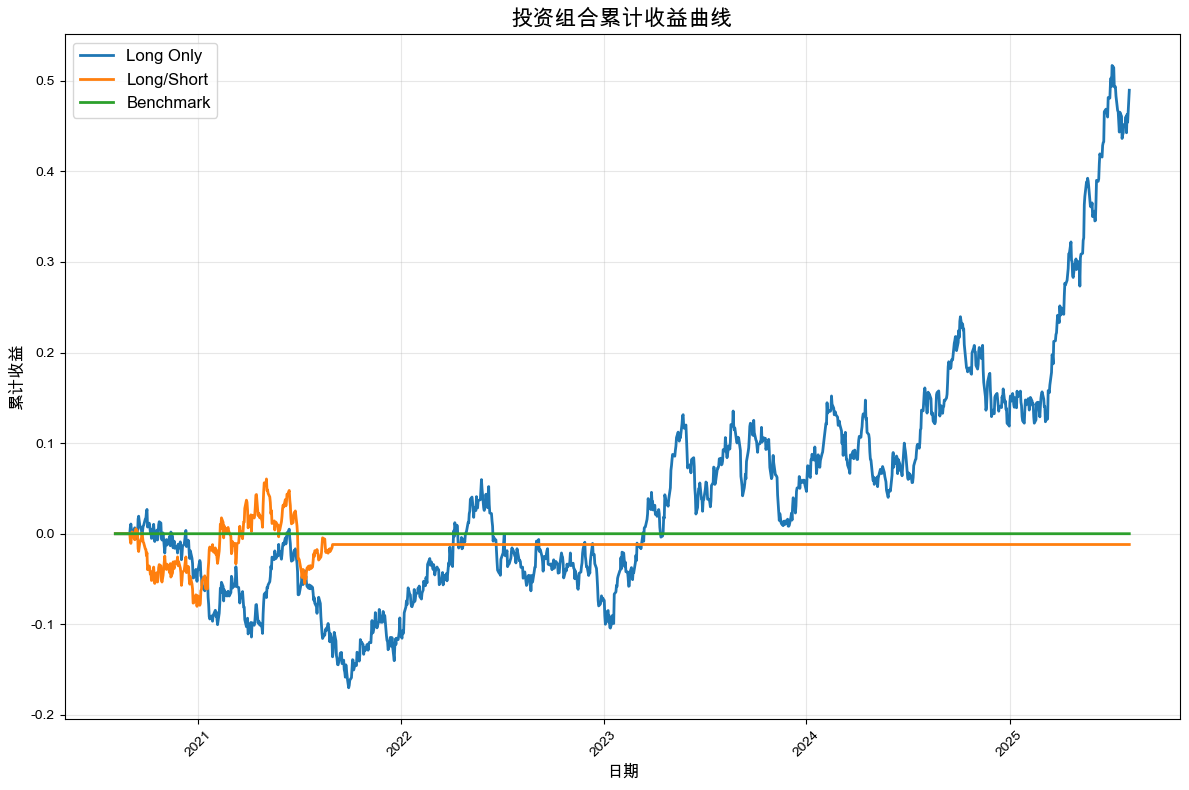

2025-08-04 21:31:43,258 - INFO - 正在计算信息比率...


2025-08-04 21:31:43,263 - INFO - 计算信息比率


2025-08-04 21:31:43,266 - INFO - 计算信息比率


2025-08-04 21:31:43,269 - INFO - 信息比率已保存到 /Users/mac/Downloads/auxiliary_qwen_coder/visualization/../results/information_ratios.csv


2025-08-04 21:31:43,269 - INFO - 
信息比率 (Information Ratio):


2025-08-04 21:31:43,270 - INFO -     Portfolio  Information_Ratio
0   Long Only            0.03888
1  Long/Short           -0.00060


In [5]:
# 使用 matplotlib 绘制所有投资组合的累计收益曲线
plot_cumulative_returns()

### 使用 Plotly 进行可视化

我们也可以选择使用 Plotly 引擎进行更交互式的可视化：


In [6]:
# 使用 plotly 绘制所有投资组合的累计收益曲线
plot_cumulative_returns(engine='plotly')

2025-08-04 21:31:43,279 - INFO - 正在加载投资组合历史数据...


2025-08-04 21:31:43,280 - INFO - 加载投资组合历史数据: Long Only


2025-08-04 21:31:43,286 - INFO - 加载投资组合历史数据: Long/Short


2025-08-04 21:31:43,291 - INFO - 加载投资组合历史数据: Benchmark


2025-08-04 21:31:43,295 - INFO - 正在计算累计收益...


2025-08-04 21:31:44,155 - INFO - 累计收益曲线已保存到 /Users/mac/Downloads/auxiliary_qwen_coder/visualization/../results/cumulative_returns.html


2025-08-04 21:31:44,569 - INFO - 正在计算信息比率...


2025-08-04 21:31:44,586 - INFO - 计算信息比率


2025-08-04 21:31:44,605 - INFO - 计算信息比率


2025-08-04 21:31:44,645 - INFO - 信息比率已保存到 /Users/mac/Downloads/auxiliary_qwen_coder/visualization/../results/information_ratios.csv


2025-08-04 21:31:44,648 - INFO - 
信息比率 (Information Ratio):


2025-08-04 21:31:44,651 - INFO -     Portfolio  Information_Ratio
0   Long Only            0.03888
1  Long/Short           -0.00060


### 绘制特定的投资组合

我们还可以选择只绘制特定的投资组合：


2025-08-04 21:31:44,686 - INFO - 正在加载投资组合历史数据...


2025-08-04 21:31:44,691 - INFO - 加载投资组合历史数据: Long Only


2025-08-04 21:31:44,713 - INFO - 加载投资组合历史数据: Long/Short


2025-08-04 21:31:44,730 - INFO - 加载投资组合历史数据: Benchmark


2025-08-04 21:31:44,747 - INFO - 正在计算累计收益...


2025-08-04 21:31:46,485 - INFO - 累计收益曲线已保存到 /Users/mac/Downloads/auxiliary_qwen_coder/visualization/../results/cumulative_returns.png


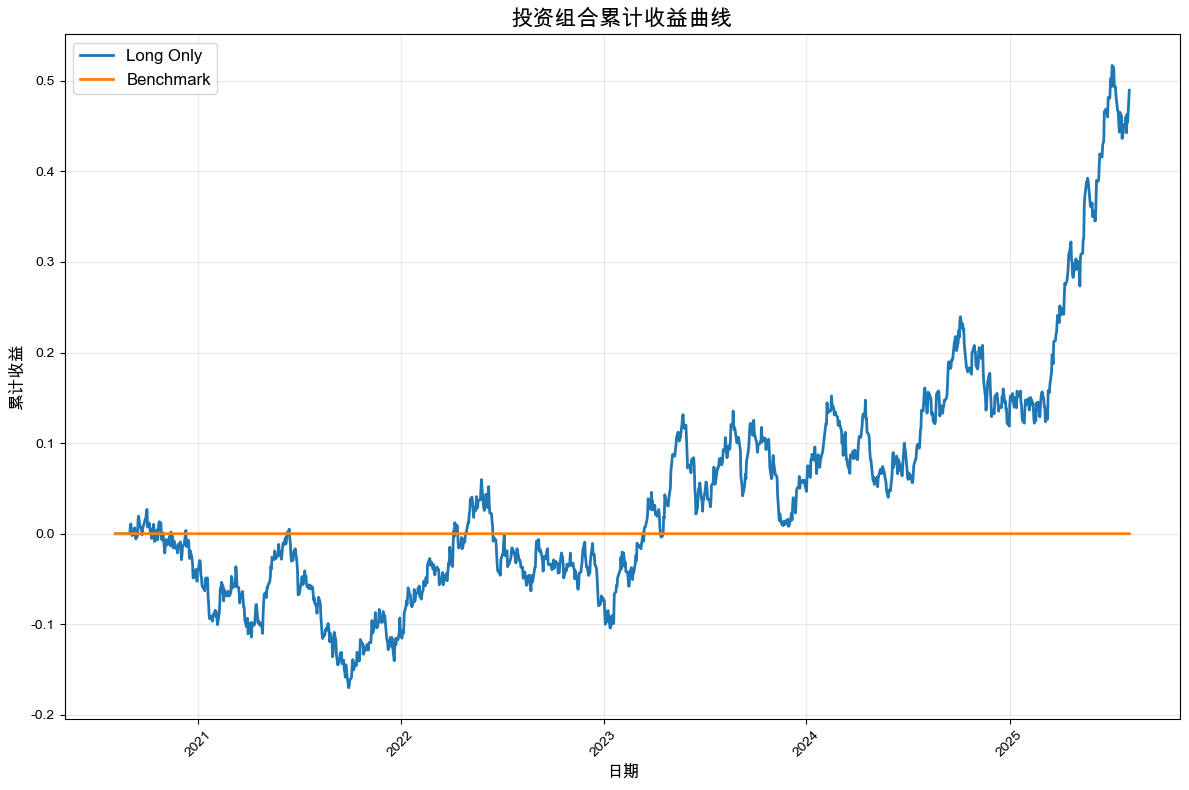

2025-08-04 21:31:46,673 - INFO - 正在计算信息比率...


2025-08-04 21:31:46,675 - INFO - 计算信息比率


2025-08-04 21:31:46,677 - INFO - 信息比率已保存到 /Users/mac/Downloads/auxiliary_qwen_coder/visualization/../results/information_ratios.csv


2025-08-04 21:31:46,678 - INFO - 
信息比率 (Information Ratio):


2025-08-04 21:31:46,679 - INFO -    Portfolio  Information_Ratio
0  Long Only            0.03888


In [7]:
# 绘制特定的投资组合
plot_cumulative_returns(portfolios=["Long Only", "Benchmark"], engine='matplotlib')

### 绘制 Long/Short 组合的多头和空头部分

我们还可以单独绘制 Long/Short 组合的多头和空头部分：


In [8]:
# 绘制 Long/Short 组合的多头和空头部分
plot_long_short_components(engine='plotly')

2025-08-04 21:31:46,687 - INFO - 正在加载 Long/Short 组合历史数据...


2025-08-04 21:31:46,688 - INFO - 加载投资组合历史数据: Long/Short


2025-08-04 21:31:46,796 - INFO - 累计收益曲线已保存到 /Users/mac/Downloads/auxiliary_qwen_coder/visualization/../results/cumulative_returns.html


## 查看结果数据

最后，我们可以查看生成的结果数据：


In [9]:
# 查看 Long Only 组合的历史数据
results_dir = 'results'
long_only_history = pd.read_csv(os.path.join(results_dir, 'Long Only_history.csv'), index_col=0, parse_dates=True)
long_only_history.head()

NAV  return  cumulative_return
date                                            
2020-08-05  1000000.0     0.0                0.0
2020-08-06  1000000.0     0.0                0.0
2020-08-07  1000000.0     0.0                0.0
2020-08-10  1000000.0     0.0                0.0
2020-08-11  1000000.0     0.0                0.0

In [10]:
# 查看信息比率
ir_data = pd.read_csv(os.path.join(results_dir, 'information_ratios.csv'))
ir_data

Portfolio  Information_Ratio
0  Long Only            0.03888